## Libraries Used

In [ ]:
# mypack <- function(package){
#   new.package <- package[!(package %in% installed.packages()[, "Package"])]
#   if (length(new.package)) 
#     install.packages(new.package, dependencies = TRUE)
#   sapply(package, require, character.only = TRUE)
# }

# #create a vector of most used R packages
# packages <- c("Metrics", "DMwR","pROC","dplyr","glmulti","lubridate","BBmisc","pROC","DMwR","readr","caret","nlme","magrittr","stringr","tidyverse","randomForest")
           
# mypack(packages)

In [1]:
library(dplyr)
library(glmulti) #Select the best linear regression model
library(lubridate) #Date Time Conversion
library(BBmisc) #Convert Rows to List
library(pROC) #ROC
library(DMwR) #Error Estimates
library(readr)
library(caret)
library(nlme)
library(magrittr)
library(stringr)
library(tidyverse)
library(randomForest)
library(e1071)
library(Metrics)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: rJava

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'BBmisc'

The following objects are masked from 'package:dplyr':

    coalesce, collapse

The following object is masked from 'package:base':

    isFALSE

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: lattice
Loading required package: grid

Attaching package: 'grid'

The following object is masked from 'package:BBmisc':

    explode

Loading required package: ggplot2

Attaching package: 'nlme'

The following object is masked from 'package:BBmisc':

    collapse

The following object is masked from 'package:dplyr':

    co

## Read Dataset

In [9]:
n_max_market = 1000
n_max_news = 100000

In [10]:
market_all = read_csv("market_train_df.csv",n_max = n_max_market)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  time = col_datetime(format = ""),
  assetCode = col_character(),
  assetName = col_character(),
  volume = col_double(),
  close = col_double(),
  open = col_double(),
  returnsClosePrevRaw1 = col_double(),
  returnsOpenPrevRaw1 = col_double(),
  returnsClosePrevMktres1 = col_character(),
  returnsOpenPrevMktres1 = col_character(),
  returnsClosePrevRaw10 = col_double(),
  returnsOpenPrevRaw10 = col_double(),
  returnsClosePrevMktres10 = col_character(),
  returnsOpenPrevMktres10 = col_character(),
  returnsOpenNextMktres10 = col_double(),
  universe = col_double()
)


In [11]:
head(market_all)

X1,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,2007-02-01 22:00:00,A.N,Agilent Technologies Inc,2606900,32.19,32.17,0.0059375000,0.005312500,NA,NA,-0.001860465,0.000622084,NA,NA,0.034672040,1
1,2007-02-01 22:00:00,AAI.N,AirTran Holdings Inc,2051600,11.12,11.08,0.0045167118,-0.007168459,NA,NA,-0.078707539,-0.088065844,NA,NA,0.027803280,0
2,2007-02-01 22:00:00,AAP.N,Advance Auto Parts Inc,1164800,37.51,37.99,-0.0115942029,0.025647948,NA,NA,0.014332071,0.045404513,NA,NA,0.024432913,1
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,23747329,84.74,86.23,-0.0115478829,0.016323885,NA,NA,-0.048613450,-0.037181778,NA,NA,-0.007424612,1
4,2007-02-01 22:00:00,ABB.N,ABB Ltd,1208600,18.02,18.01,0.0117911286,0.025042686,NA,NA,0.012928612,0.020396601,NA,NA,-0.017994120,1
5,2007-02-01 22:00:00,ABC.N,AmerisourceBergen Corp,1657300,52.37,52.40,-0.0001909126,0.008468052,NA,NA,0.088999792,0.077745784,NA,NA,0.058680420,1


In [12]:
print("Dimensions of Market")
dim(market_all)

[1] "Dimensions of Market"


[1] 1000   17

In [13]:
news_all = read_csv("news_train_df.csv",n_max = n_max_news)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_integer(),
  time = col_datetime(format = ""),
  sourceTimestamp = col_datetime(format = ""),
  firstCreated = col_datetime(format = ""),
  sourceId = col_character(),
  headline = col_character(),
  provider = col_character(),
  subjects = col_character(),
  audiences = col_character(),
  headlineTag = col_character(),
  marketCommentary = col_character(),
  assetCodes = col_character(),
  assetName = col_character(),
  relevance = col_double(),
  sentimentNegative = col_double(),
  sentimentNeutral = col_double(),
  sentimentPositive = col_double()
)
See spec(...) for full column specifications.


In [14]:
head(news_all)

X1,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32,2007-01-01 04:29:32,2007-01-01 04:29:32,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil in 06,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', 'LEN', 'CRU'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35,2007-01-01 07:03:34,2007-01-01 07:03:34,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'IL', 'MEAST', 'BD', 'US', 'HT', 'RTRS', 'CO', 'LIF', 'LEN'}",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56,2007-01-01 11:29:56,2007-01-01 11:29:56,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'RET', 'ENR', 'ID', 'BG', 'US', 'PRESS', 'IQ', 'RO', 'NGS', 'TH', 'BY', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,0,0,0
5,2007-01-01 12:08:37,2007-01-01 12:08:37,2007-01-01 12:08:37,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'BUS', 'ENT', 'WWW', 'LEI', 'US', 'PRESS', 'USC', 'RTRS', 'LEN'}",...,0,0,0,0,0,0,0,0,2,3


In [15]:
print("Dimensions of News")
dim(news_all)

[1] "Dimensions of News"


[1] 100000     36

In [16]:
dtype.market = as.data.frame(sapply(market_all,class))
dtype.news = as.data.frame(sapply(news_all,class))
print("Market Details Data Types")
head(dtype.market,n=1)
print("News Details Data Types")
head(dtype.news,n=1)

[1] "Market Details Data Types"


X1,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
integer,POSIXct,character,character,numeric,numeric,numeric,numeric,numeric,character,character,numeric,numeric,character,character,numeric,numeric


[1] "News Details Data Types"


X1,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
integer,POSIXct,POSIXct,POSIXct,character,character,integer,integer,character,character,...,integer,integer,integer,integer,integer,integer,integer,integer,integer,integer


## Clean Dataset

In [17]:
market = market_all[,colSums(is.na(market_all))<nrow(market_all)]

In [18]:
news = news_all[,colSums(is.na(news_all))<nrow(news_all)]

In [19]:
print("Dimensions of Market after cleaning")
dim(market)
print("Dimensions of News after cleaning")
dim(news)

[1] "Dimensions of Market after cleaning"


[1] 1000   13

[1] "Dimensions of News after cleaning"


[1] 100000     36

## Data Preparation for Modelling

### Functions Used

In [20]:
clean_elements_function = function(x){
  x = str_squish(x)
  x = gsub("[{}]", "", x)
  x = gsub("'", '', x)
}

count_function = function(x){
  value = length(unlist(strsplit(as.character(x), ",")))
}

last_element_list_function = function(x){
  value = unlist(strsplit(as.character(x), ","))
  value = as.character(value[length(value)])
  clean_elements_function(value)
}

count_characters_function = function(x){
  x = unlist(x)
  x = nchar(str_squish(x), type = "chars")
}

### Market

In [21]:
market_data_preparation = function(market){
  
  market$time = as.Date(market$time)
  
  volume_to_mean = market['volume'] / mean(market$volume)
  volume_to_mean = as.data.frame(volume_to_mean)
  colnames(volume_to_mean) = c("volume_to_mean")
  market = cbind(market,(volume_to_mean))
    
  returnsOpenPrevRaw1_to_volume = market['returnsOpenPrevRaw1'] / market['volume']
  returnsOpenPrevRaw1_to_volume = as.data.frame(returnsOpenPrevRaw1_to_volume)
  colnames(returnsOpenPrevRaw1_to_volume) = c("returnsOpenPrevRaw1_to_volume")
  market = cbind(market,(returnsOpenPrevRaw1_to_volume))
  
  close_to_open = market['close'] / market['open']
  close_to_open = as.data.frame(close_to_open)
  colnames(close_to_open) = c("close_to_open")
  market = cbind(market,(close_to_open))
  
  return((market))
}

### News

In [22]:
news_data_preparation = function(news){
  news['sentence_word_count'] =  news['wordCount'] / news['sentenceCount']
  news['time']= hour(news$time)
  news['sourceTimestamp']= hour(news$sourceTimestamp)
  news['firstCreated']= as.Date(news$firstCreated)
  
  asset.codes.list = convertRowsToList(news['assetCodes'])
  asset.codes.len  = t(as.data.frame(lapply(asset.codes.list, count_function)))
  colnames(asset.codes.len) = c("assetCodesLen")
  news = cbind(news,asset.codes.len)
  news['assetCodes'] = t(as.data.frame(lapply(asset.codes.list, last_element_list_function)))
  asset.codes.list.new = convertRowsToList(news['assetCodes'])
  news['assetCodesLen'] = t(as.data.frame(lapply(asset.codes.list.new, count_characters_function)))
  
  headlines.list = convertRowsToList(news['headline'])
  headlines.len = t(as.data.frame(lapply(headlines.list, count_characters_function)))
  colnames(headlines.len) = c("headlinesLen")
  news = cbind(news,headlines.len)
  
  asset.sentiment.count.dataframe = news%>%
    group_by(assetName,sentimentClass)%>%
    select(time)%>%
    tally
  new.column = asset.sentiment.count.dataframe[match(news$assetName,asset.sentiment.count.dataframe$assetName),3]
  asset.sentiment.count = as.data.frame(new.column)
  colnames(asset.sentiment.count) = c("assetSentimentCount")
  news = cbind(news,asset.sentiment.count)
 
  df_old = as.data.frame(news['headlineTag'])
  a = convertRowsToList(unique(df_old['headlineTag']))
  b = unlist(a)
  x = as.array(clean_elements_function(b))
  y = seq(0,length(x)-1)
  df = as.data.frame(cbind(x,y))
  new.column = df[match(df_old$headlineTag, df$x),2]
  headline.Tag.T = as.data.frame(new.column)
  colnames(headline.Tag.T) = c("headlineTagT")
  news = cbind(news,headline.Tag.T)
    
  colnames(news)[which(names(news) == "assetName")] = "assetNames"
  colnames(news)[which(names(news) == "time")] = "time.news"
  return(news)
}

### Combining the datasets

In [23]:
combined_data_preparation = function(market,news){
  combined_df = merge(x=market,y=news,by.x = c("time", "assetName"), by.y =c("firstCreated", "assetNames"))
  combined_df = na.omit(combined_df)
  return(combined_df)
}

## Modelling

In [24]:
modelling.function = function(regression.function, data, fitfunction){
  
  model = glmulti(regression.function,
          level = 2,               
          method = "g",  
          data = data,
          crit = "aicc",   
          deltaB = 0,
          deltaM = 0.01, 
          conseq = 5, 
          plotty = FALSE,
          report = FALSE,
          confsetsize = 5,
          fitfunction = fitfunction)
    
    return(model)
  }


In [25]:
calculation.function = function(model,data){
    
  number = length(model@formulas)
  
  aic = rep(0, number)
  model.glm = rep(NA, number)
  rsquared = rep(0, number)
  mae = rep(0, number)
  mse = rep(0, number)
  rmse = rep(0, number)
  mape = rep(0, number)
  
  for(i in 1:number){
    fit = glm(paste(as.character(model@formulas[i])), data = data)
    model.glm[i] = paste(as.character(model@formulas[i]))
    aic[i] = fit$aic
    predicted.values = predict(fit, data)
    rsquared[i] = 1 - (fit$deviance/fit$null.deviance)
    
    predicted_actual_df = data.frame(cbind(actuals=data$returnsOpenNextMktres10, predicteds=predicted.values))
    
    errors = regr.eval(predicted_actual_df$actuals, predicted_actual_df$predicteds)
    mae[i] = errors[1]
    mse[i] = errors[2]
    rmse[i] = errors[3]
    mape[i] = errors[4]
  }
  
  df = data.frame(model.glm,aic,rsquared,mae,mse,rmse,mape)
  colnames(df) = c("MODEL", "AIC", "R_SQUARED", "MAE", "MSE", "RMSE", "MAPE")
    
  return(list(best.model = model, dataframe = df))
}

In [26]:
display.modelling.result = function(value){
  best.model = value$best.model
  dataframe = value$dataframe
  
  print("Brief summary")
  print(best.model)
  print("Best model")
  summary(best.model@objects[[1]])
  print("Best model results")
  print(t(as.data.frame(head(dataframe, n=1))))
  print("Top 5 model results")
  print(dataframe)
}

In [27]:
plot.modelling.result = function(value){
  best.model = value$best.model
  dataframe = value$dataframe

  plot(best.model)
  plot(best.model, type="s")
}

In [28]:
roc.curve = function(value,data){
  best.model = value$best.model
  fit = glm(paste(as.character(best.model@formulas[1])), data = data)
  predicted.values = predict(fit, newdata = data)
  data$predictions = predicted.values
  train_data = data.frame(data)
  plot(roc(data$returnsOpenNextMktres10 ~ data$predictions), main = "ROC for best model")
  
}

## Stock Data Regression

### Stock Data Regression without transforming the variables

In [29]:
m1 = market%>%
  select(returnsOpenNextMktres10,volume,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,open,close)

In [30]:
head(m1)

returnsOpenNextMktres10,volume,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,open,close
0.034672040,2606900,0.0059375000,0.005312500,-0.001860465,32.17,32.19
0.027803280,2051600,0.0045167118,-0.007168459,-0.078707539,11.08,11.12
0.024432913,1164800,-0.0115942029,0.025647948,0.014332071,37.99,37.51
-0.007424612,23747329,-0.0115478829,0.016323885,-0.048613450,86.23,84.74
-0.017994120,1208600,0.0117911286,0.025042686,0.012928612,18.01,18.02
0.058680420,1657300,-0.0001909126,0.008468052,0.088999792,52.40,52.37


### LM

In [31]:
a11 = modelling.function(returnsOpenNextMktres10~., m1,"lm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [32]:
a1 = calculation.function(a11,m1)

In [33]:
display.modelling.result(a1)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: lm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3139.19108430718
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsClosePrevRaw1 + returnsClosePrevRaw10:returnsOpenPrevRaw1 + "
[2] "    open:returnsClosePrevRaw1 + close:returnsClosePrevRaw1 + "                                    
[3] "    close:returnsOpenPrevRaw1"                                                                    
Evidence weight: 0.279399374050002
Worst IC: -3137.73102693368
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence after 220 generations.
Time elapsed: 19.1503460407257 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                                                                    
MODEL     "returnsOpenNextMktres10 ~ 1 + returnsClosePrevRaw1 + returnsClosePrevRaw10

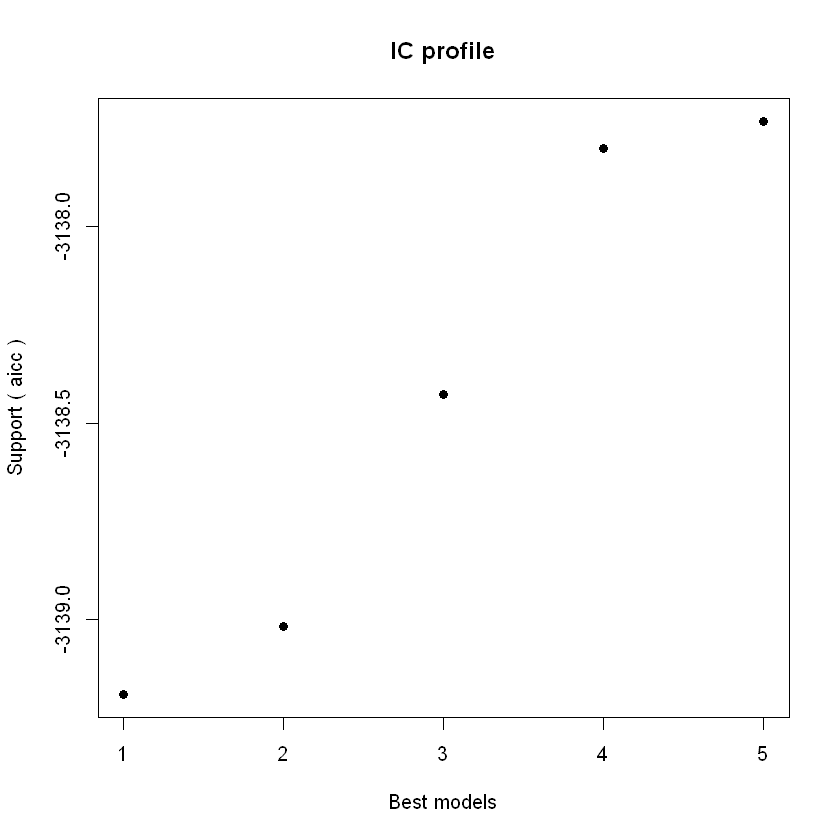

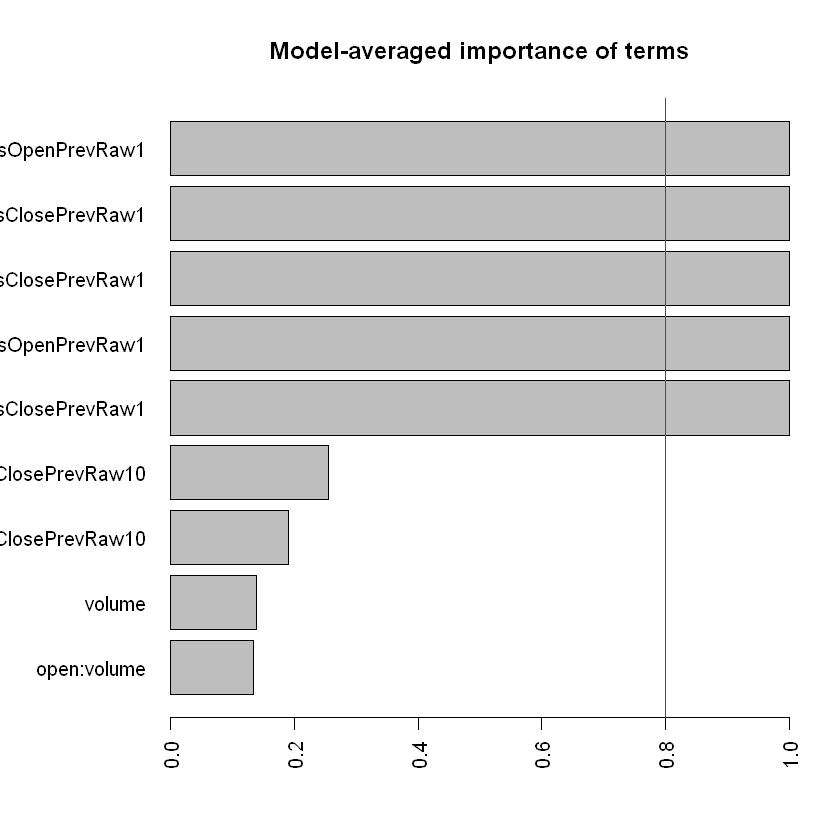

In [34]:
plot.modelling.result(a1)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

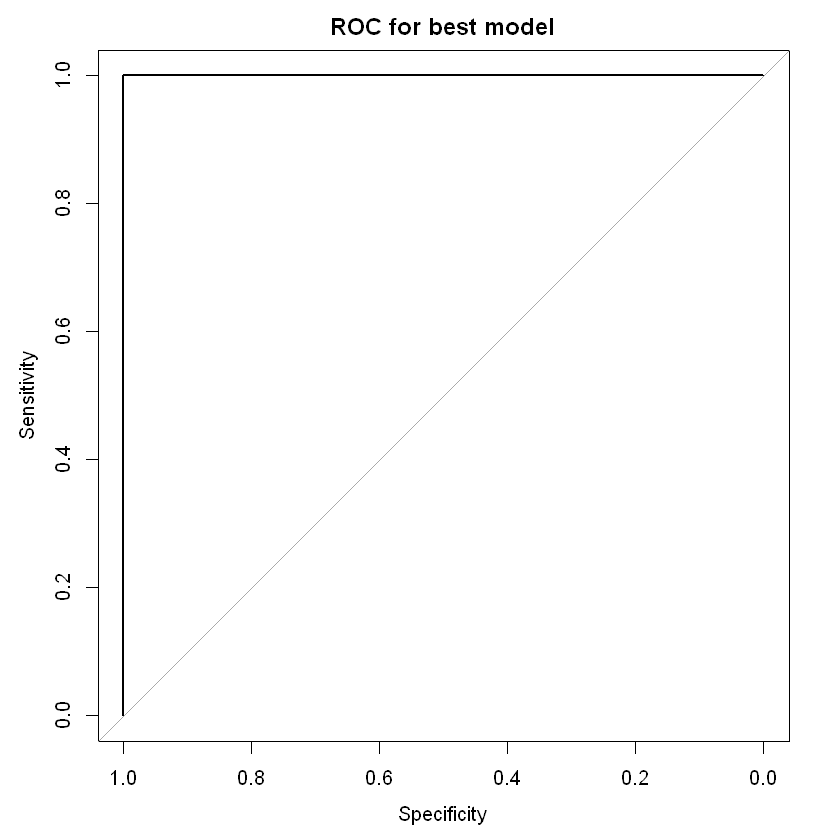

In [35]:
roc.curve(a1,m1)

## GLM

In [36]:
a21 = modelling.function(returnsOpenNextMktres10~., m1,"glm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [38]:
a2 = calculation.function(a21,m1)

In [39]:
display.modelling.result(a2)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3139.19108430718
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsClosePrevRaw1 + returnsClosePrevRaw10:returnsOpenPrevRaw1 + "
[2] "    open:returnsClosePrevRaw1 + close:returnsClosePrevRaw1 + "                                    
[3] "    close:returnsOpenPrevRaw1"                                                                    
Evidence weight: 0.244222228934114
Worst IC: -3138.00938177735
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence after 180 generations.
Time elapsed: 24.6798851490021 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                                                                    
MODEL     "returnsOpenNextMktres10 ~ 1 + returnsClosePrevRaw1 + returnsClosePrevRaw1

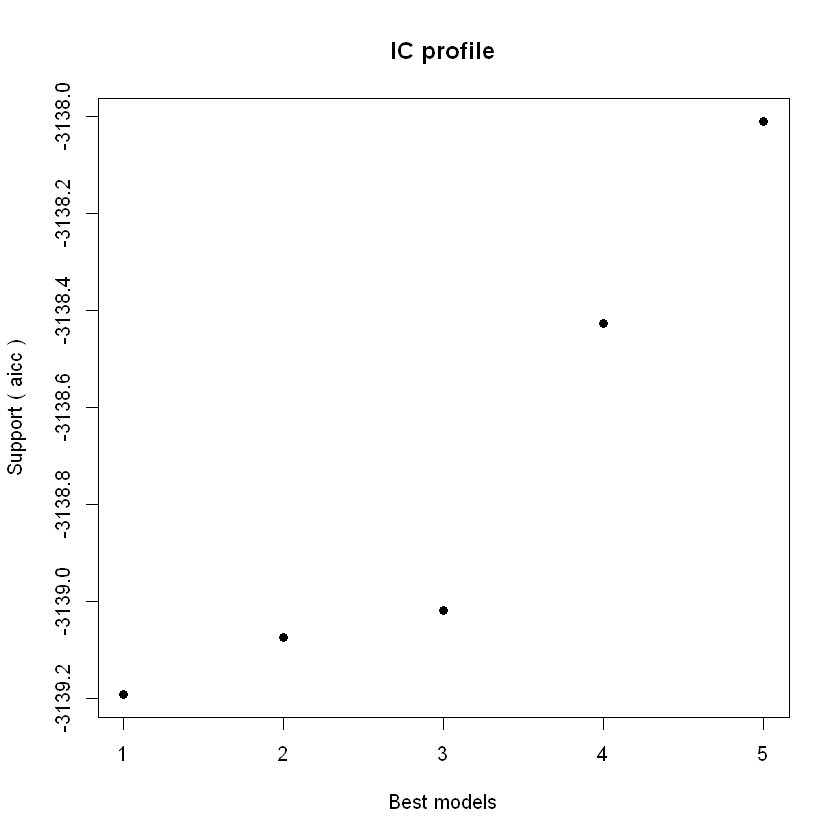

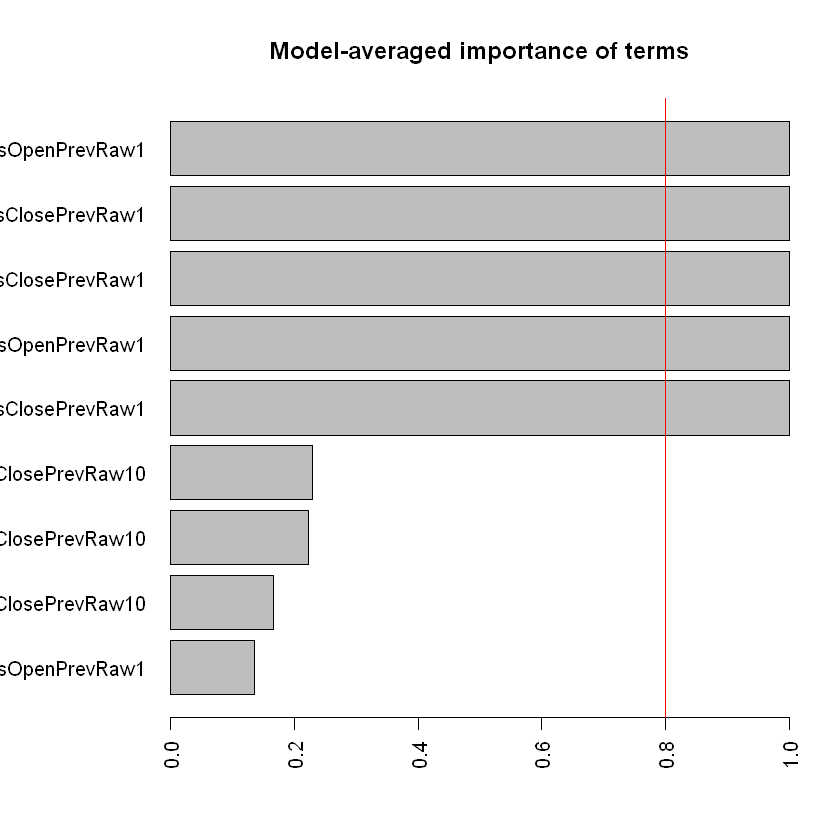

In [40]:
plot.modelling.result(a2)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

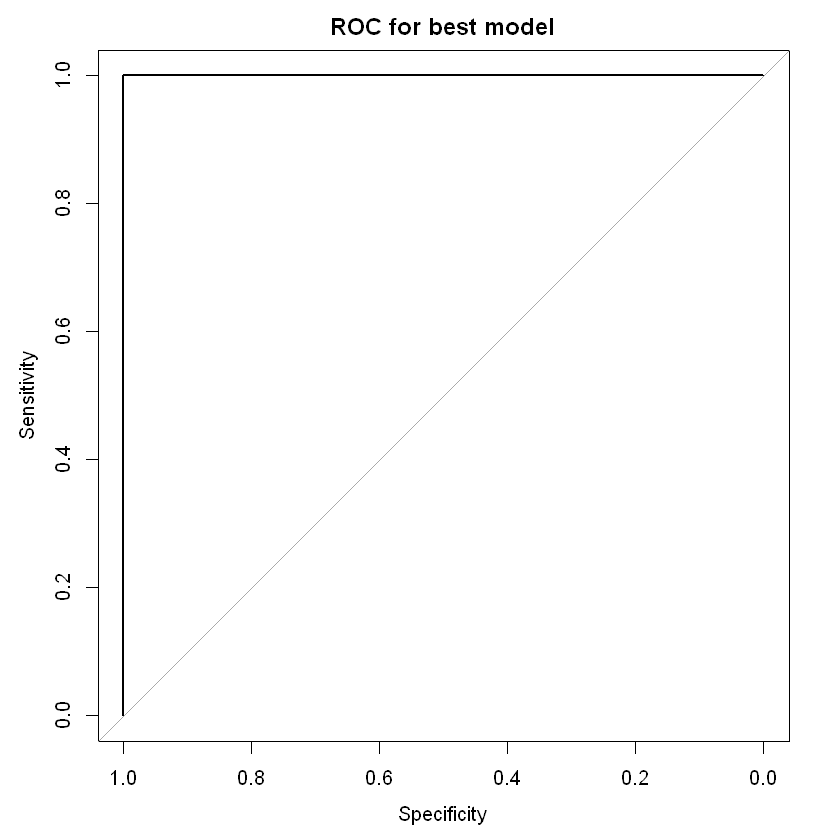

In [41]:
roc.curve(a2,m1)

## GLS

In [42]:
a31 = modelling.function(returnsOpenNextMktres10~., m1,"gls")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [43]:
a3 = calculation.function(a31,m1)

In [44]:
display.modelling.result(a3)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: gls / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3116.22899164311
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1:returnsClosePrevRaw1 + "                    
[2] "    returnsClosePrevRaw10:returnsClosePrevRaw1 + returnsClosePrevRaw10:returnsOpenPrevRaw1 + "
[3] "    open:returnsOpenPrevRaw1"                                                                 
Evidence weight: 0.497068156148542
Worst IC: -3105.12492391756
2 models within 2 IC units.
3 models to reach 95% of evidence weight.
Convergence after 140 generations.
Time elapsed: 15.1870641708374 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                                                                           
MODEL     "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1:returnsClosePrevRaw1 + retur

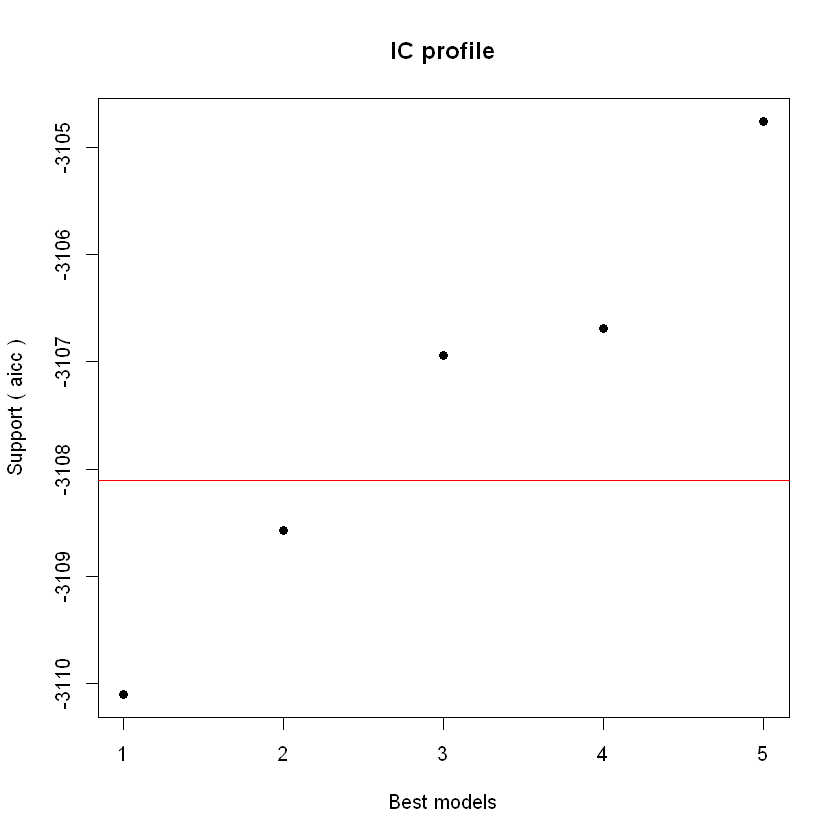

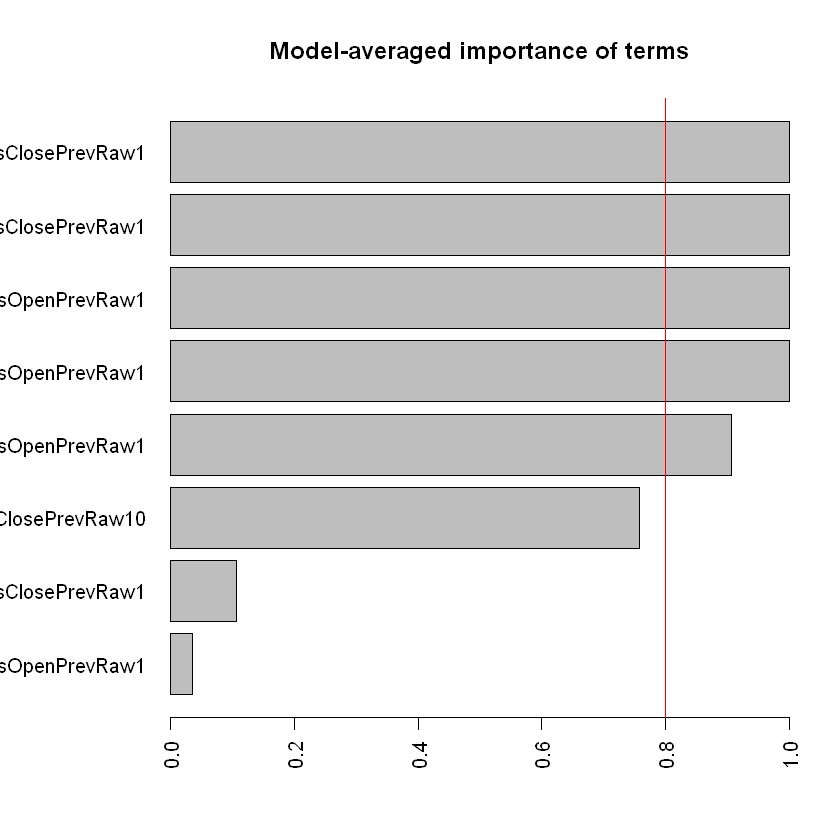

In [46]:
plot.modelling.result(a3)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

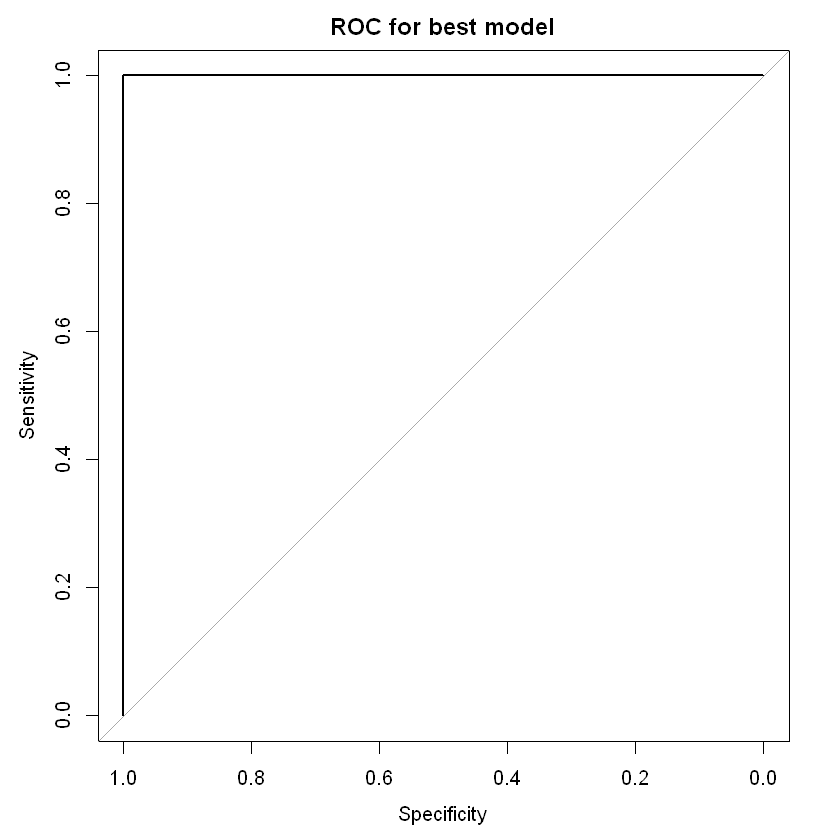

In [45]:
roc.curve(a3,m1)

### Stock Data Regression after transforming the variables

In [46]:
market_changed1 = market_data_preparation(market)%>%
  select(returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open)

In [47]:
head(market_changed1)

returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open
0.034672040,1.0498578,2.037861e-09,1.0006217
0.027803280,0.8262259,-3.494082e-09,1.0036101
0.024432913,0.4690914,2.201919e-08,0.9873651
-0.007424612,9.5635880,6.873988e-10,0.9827206
-0.017994120,0.4867306,2.072041e-08,1.0005552
0.058680420,0.6674323,5.109547e-09,0.9994275


### LM

In [48]:
b11 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed1,"lm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [49]:
b1 = calculation.function(b11,market_changed1)

In [50]:
display.modelling.result(b1)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: lm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3129.0904630328
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + "
[2] "    close_to_open + returnsOpenPrevRaw1_to_volume:volume_to_mean"               
Evidence weight: 0.219178747491457
Worst IC: -3128.13454777891
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence after 60 generations.
Time elapsed: 0.124333143234253 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                            
MODEL     "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + close_to_open + returnsOpenPrevRaw1_to_volume:volume_to_mean"
AIC       "-3129.175"                                                                                             

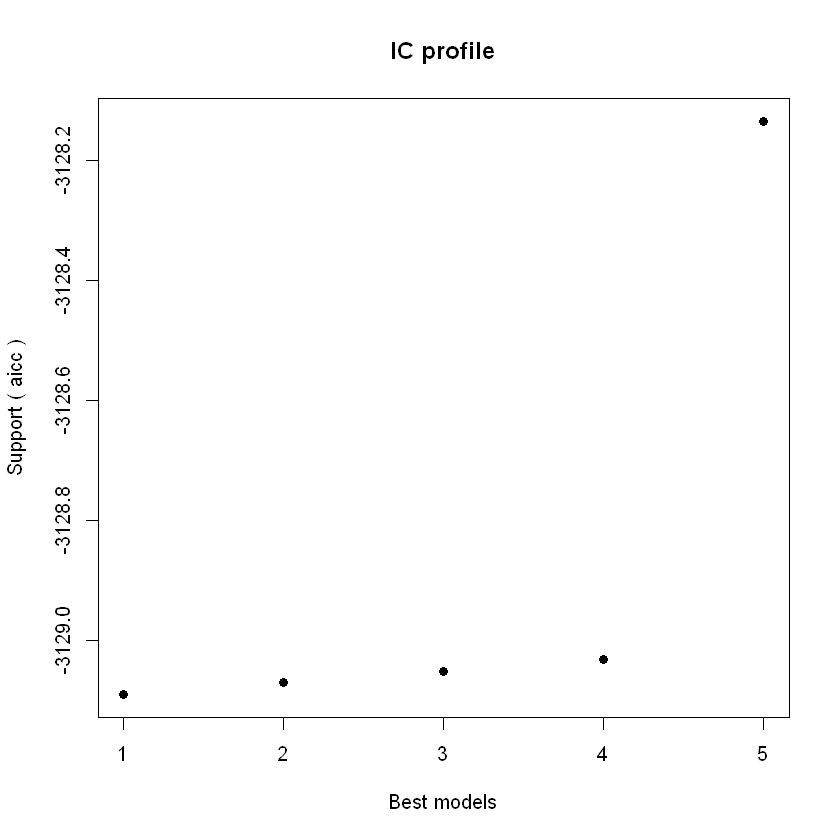

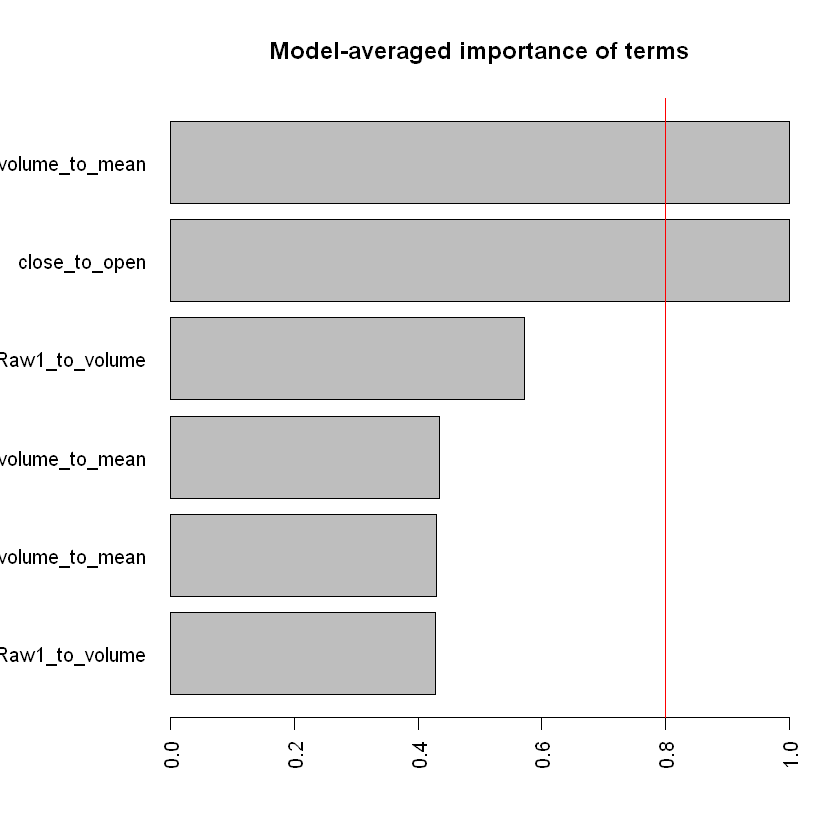

In [51]:
plot.modelling.result(b1)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

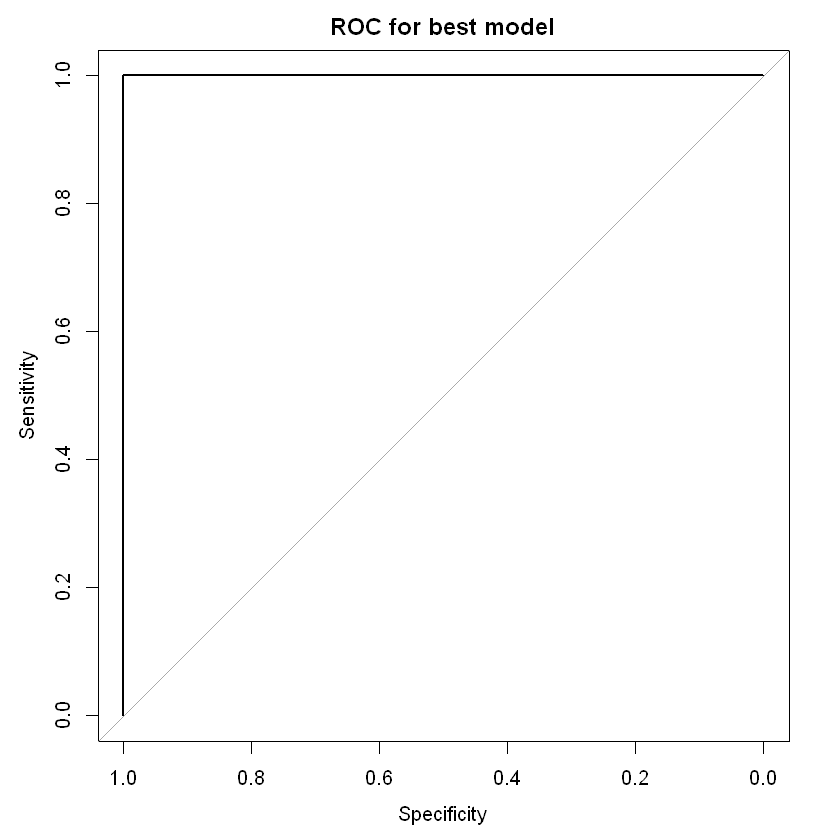

In [54]:
roc.curve(b1,market_changed1)

### GLM

In [52]:
b21 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed1,"glm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [53]:
b2 = calculation.function(b21,market_changed1)

In [54]:
display.modelling.result(b2)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3129.0904630328
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + "
[2] "    close_to_open + returnsOpenPrevRaw1_to_volume:volume_to_mean"               
Evidence weight: 0.219178747491461
Worst IC: -3128.13454777892
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence after 70 generations.
Time elapsed: 0.218078136444092 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                            
MODEL     "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + close_to_open + returnsOpenPrevRaw1_to_volume:volume_to_mean"
AIC       "-3129.175"                                                                                            

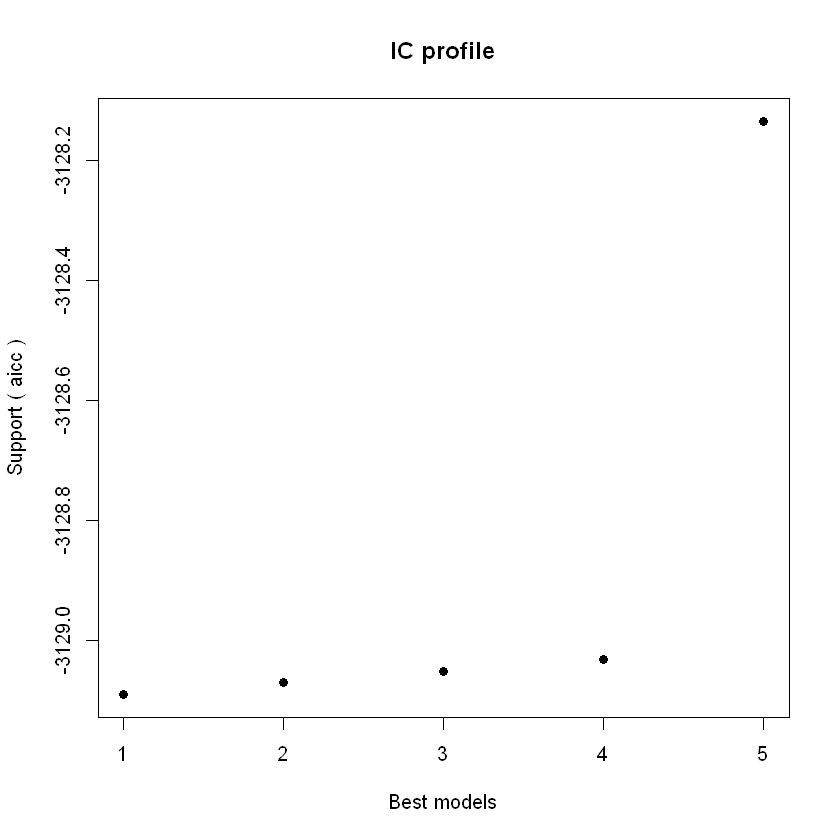

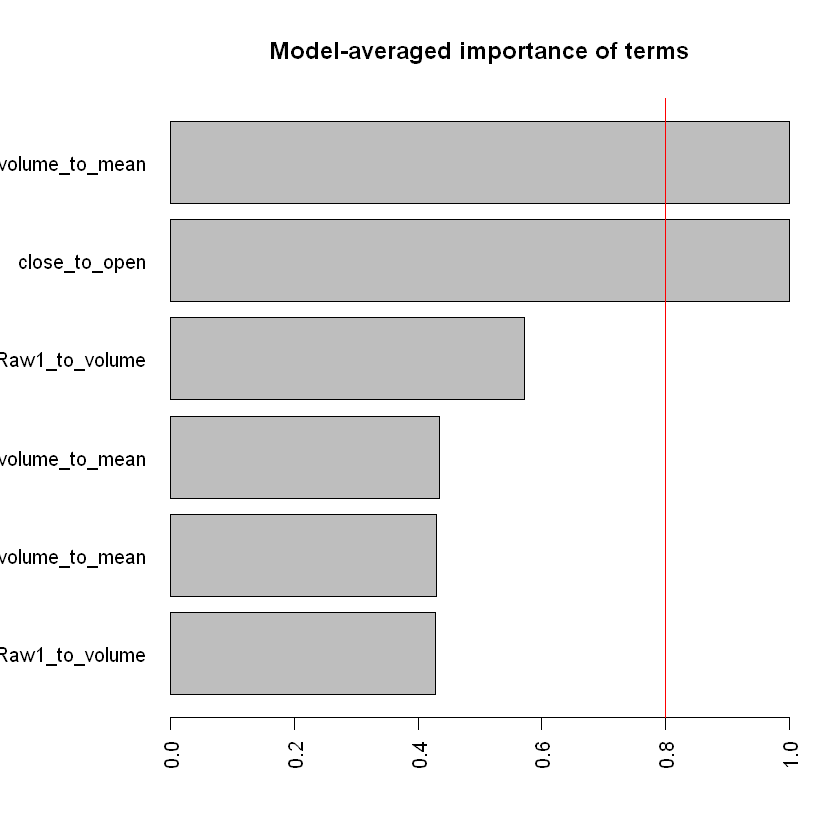

In [55]:
plot.modelling.result(b2)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

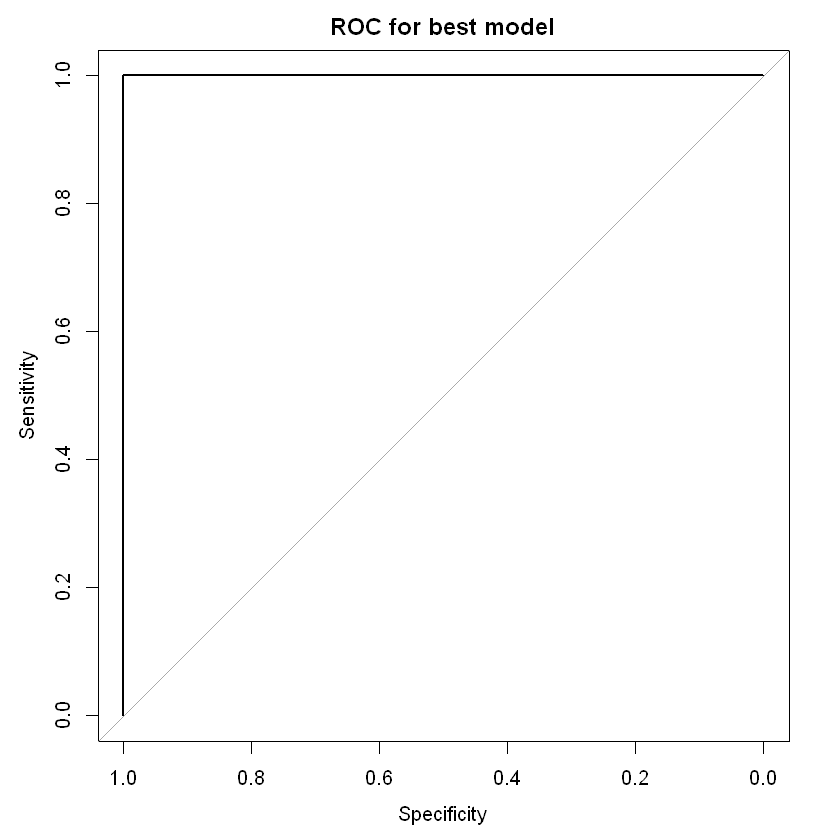

In [56]:
roc.curve(b2,market_changed1)

### GLS

In [57]:
b31 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed1,"gls")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [58]:
b3 = calculation.function(b31,market_changed1)

In [59]:
display.modelling.result(b3)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: gls / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3195.19742475582
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + "                                
[2] "    returnsOpenPrevRaw1_to_volume:volume_to_mean + close_to_open:returnsOpenPrevRaw1_to_volume"
Evidence weight: 0.513634401170661
Worst IC: -3182.86461177043
2 models within 2 IC units.
1 models to reach 95% of evidence weight.
Convergence after 70 generations.
Time elapsed: 0.183524131774902 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                                         
MODEL     "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + returnsOpenPrevRaw1_to_volume:volume_to_mean + close_to_open:returnsOpenPrevRaw1_to_volume"
AIC       "-3124.11"                                    

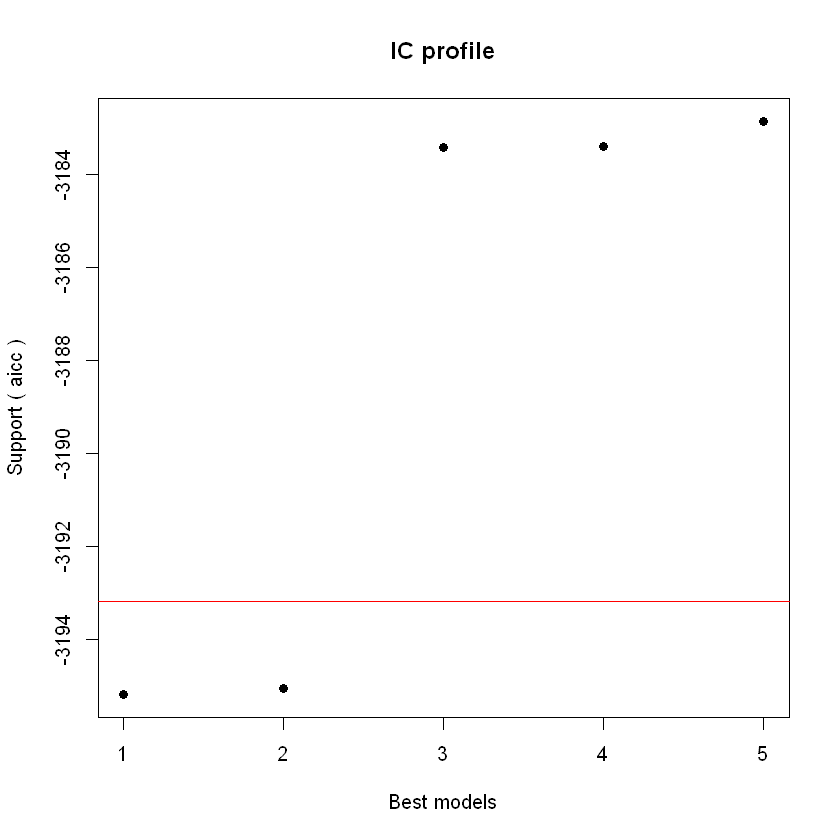

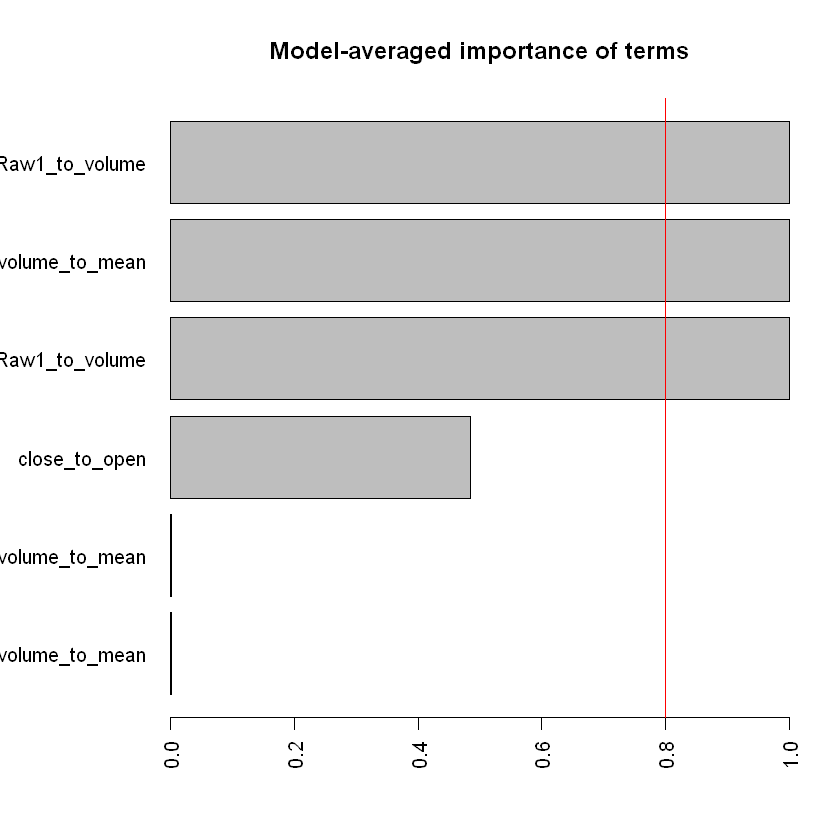

In [60]:
plot.modelling.result(b3)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

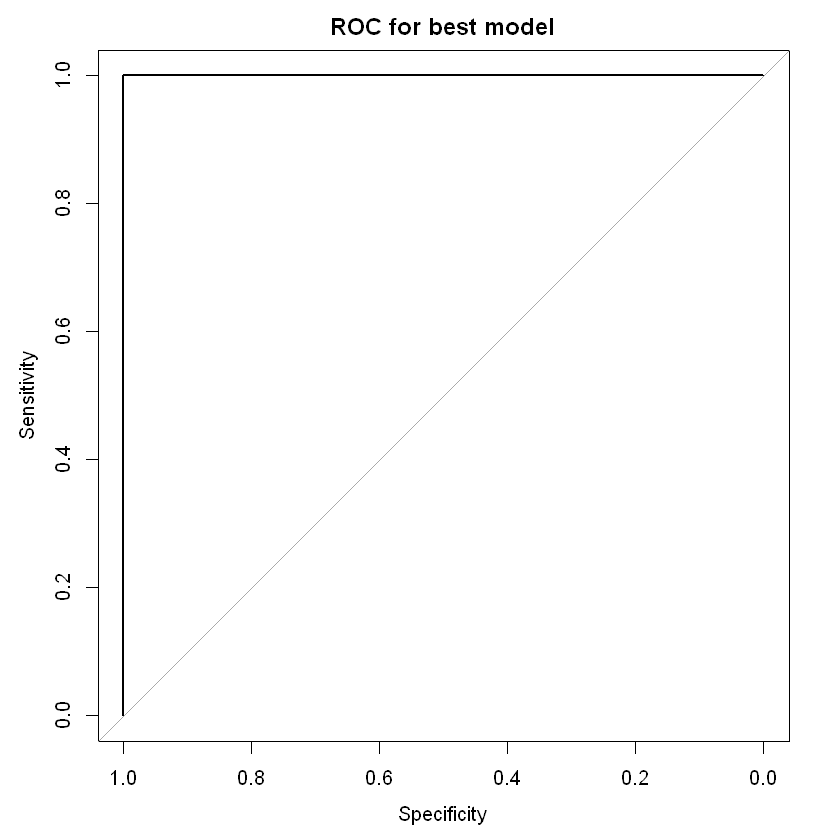

In [61]:
roc.curve(b3,market_changed1)

### Stock Data Regression using variables before and after transforming them

In [62]:
market_changed2 = market_data_preparation(market)%>%
  select(returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open,
         volume,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,open,close)

In [63]:
head(market_changed2)

returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open,volume,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,open,close
0.034672040,1.0498578,2.037861e-09,1.0006217,2606900,0.0059375000,0.005312500,-0.001860465,32.17,32.19
0.027803280,0.8262259,-3.494082e-09,1.0036101,2051600,0.0045167118,-0.007168459,-0.078707539,11.08,11.12
0.024432913,0.4690914,2.201919e-08,0.9873651,1164800,-0.0115942029,0.025647948,0.014332071,37.99,37.51
-0.007424612,9.5635880,6.873988e-10,0.9827206,23747329,-0.0115478829,0.016323885,-0.048613450,86.23,84.74
-0.017994120,0.4867306,2.072041e-08,1.0005552,1208600,0.0117911286,0.025042686,0.012928612,18.01,18.02
0.058680420,0.6674323,5.109547e-09,0.9994275,1657300,-0.0001909126,0.008468052,0.088999792,52.40,52.37


### LM

In [64]:
c11 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed2,"lm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [65]:
c1 = calculation.function(c11,market_changed2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

In [66]:
display.modelling.result(c1)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: lm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3148.86296946769
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + close_to_open + returnsClosePrevRaw1 + "                         
[2] "    returnsOpenPrevRaw1 + open + returnsOpenPrevRaw1_to_volume:volume_to_mean + "              
[3] "    close_to_open:returnsOpenPrevRaw1_to_volume + volume:volume_to_mean + "                    
[4] "    returnsOpenPrevRaw1:returnsOpenPrevRaw1_to_volume + returnsClosePrevRaw10:close_to_open + "
[5] "    open:returnsClosePrevRaw1 + close:close_to_open + close:returnsClosePrevRaw1"              
[1] "returnsOpenNextMktres10 ~ 1 + close_to_open + returnsClosePrevRaw1 + "                          
[2] "    returnsOpenPrevRaw1 + open + returnsOpenPrevRaw1_to_volume:volume_to_mean + "               
[3] "    close_to_open:returnsOpenPrevRaw1_to_volume + volume:volume_to_mean + "                     
[4] "    volume:returnsOpenP

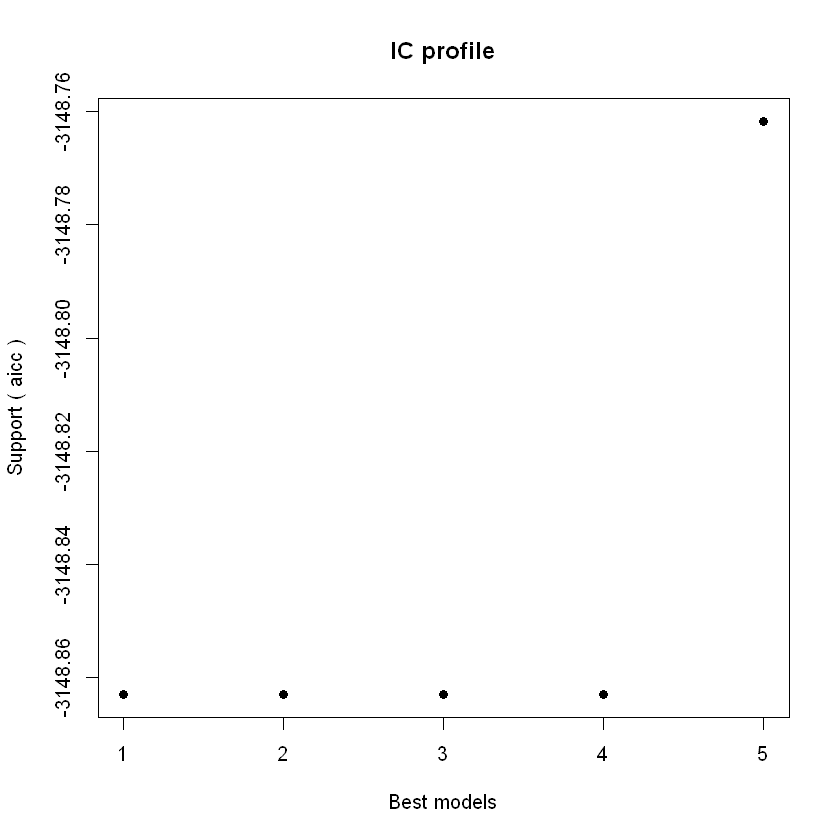

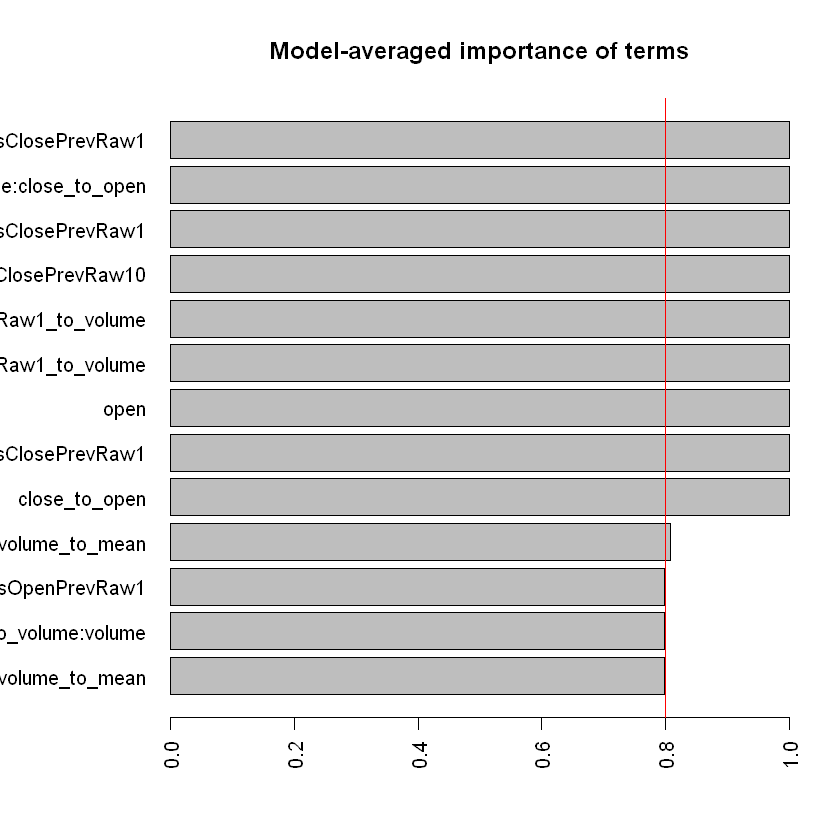

In [67]:
plot.modelling.result(c1)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

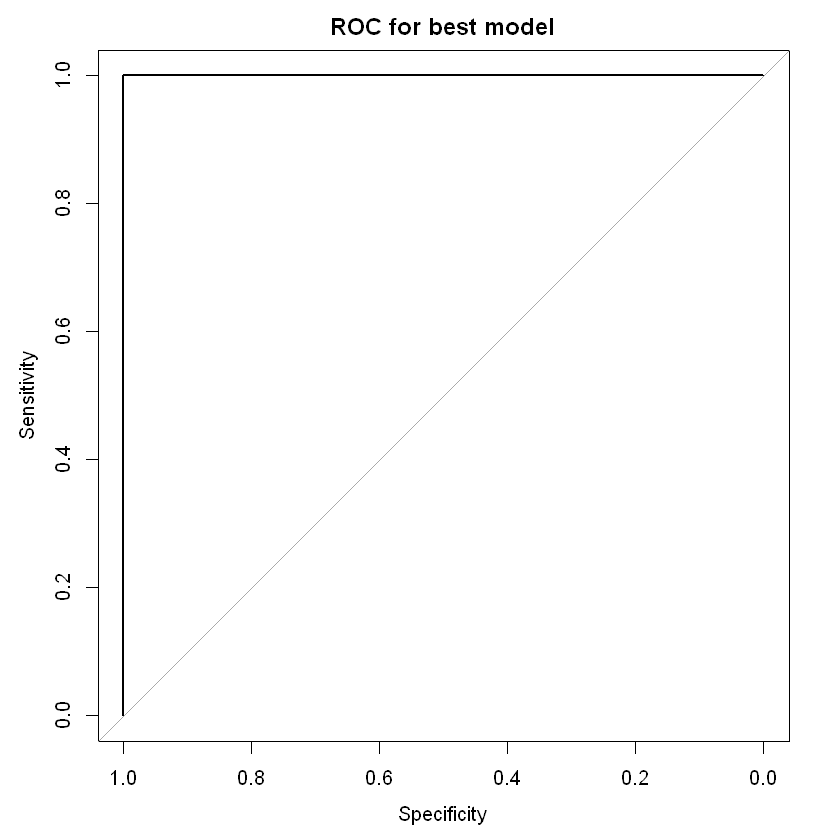

In [68]:
roc.curve(c1,market_changed2)

### GLM

In [69]:
c21 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed2,"glm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [70]:
c2 = calculation.function(c21,market_changed2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

In [71]:
display.modelling.result(c2)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -3149.97373366043
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + "                                               
[2] "    close_to_open + close + close_to_open:volume_to_mean + volume:close_to_open + "                           
[3] "    returnsClosePrevRaw1:returnsOpenPrevRaw1_to_volume + returnsOpenPrevRaw1:returnsOpenPrevRaw1_to_volume + "
[4] "    returnsClosePrevRaw10:returnsOpenPrevRaw1 + open:returnsOpenPrevRaw1_to_volume + "                        
[5] "    open:close_to_open + open:returnsClosePrevRaw1 + open:returnsOpenPrevRaw1 + "                             
[6] "    open:returnsClosePrevRaw10 + close:returnsOpenPrevRaw1_to_volume + "                                      
[7] "    close:returnsClosePrevRaw1 + close:returnsClosePrevRaw10"                                                 
[1] "returnsOpenNextMktres

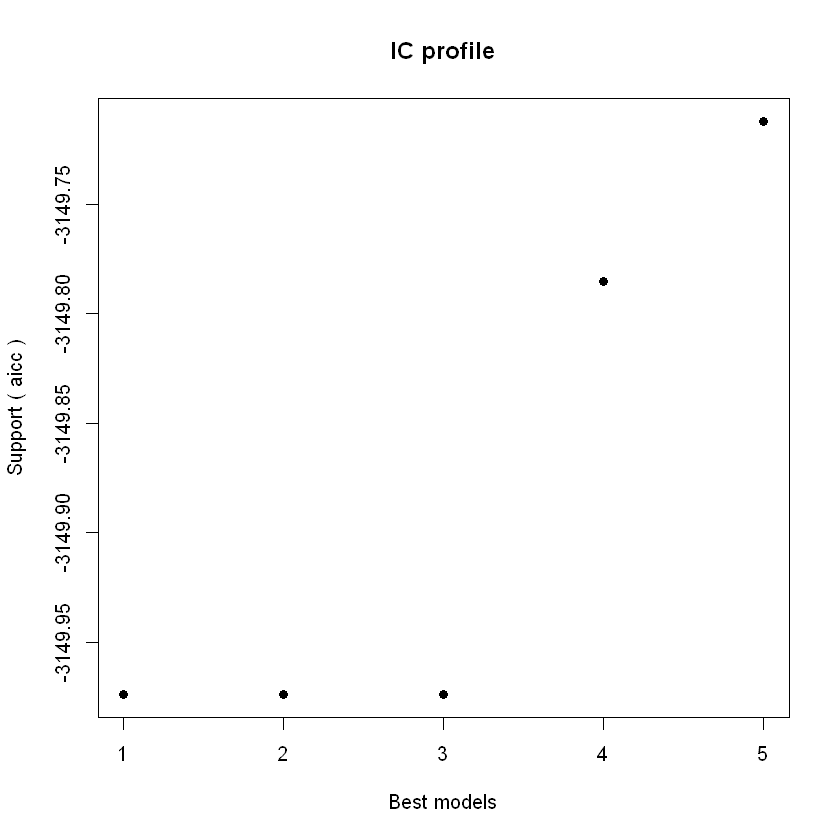

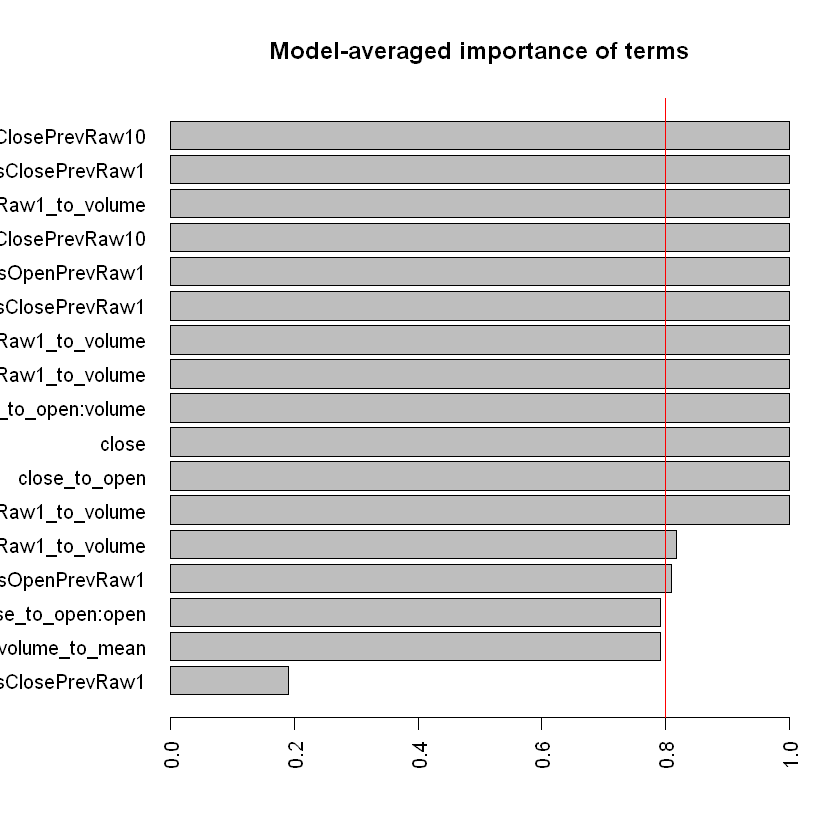

In [72]:
plot.modelling.result(c2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

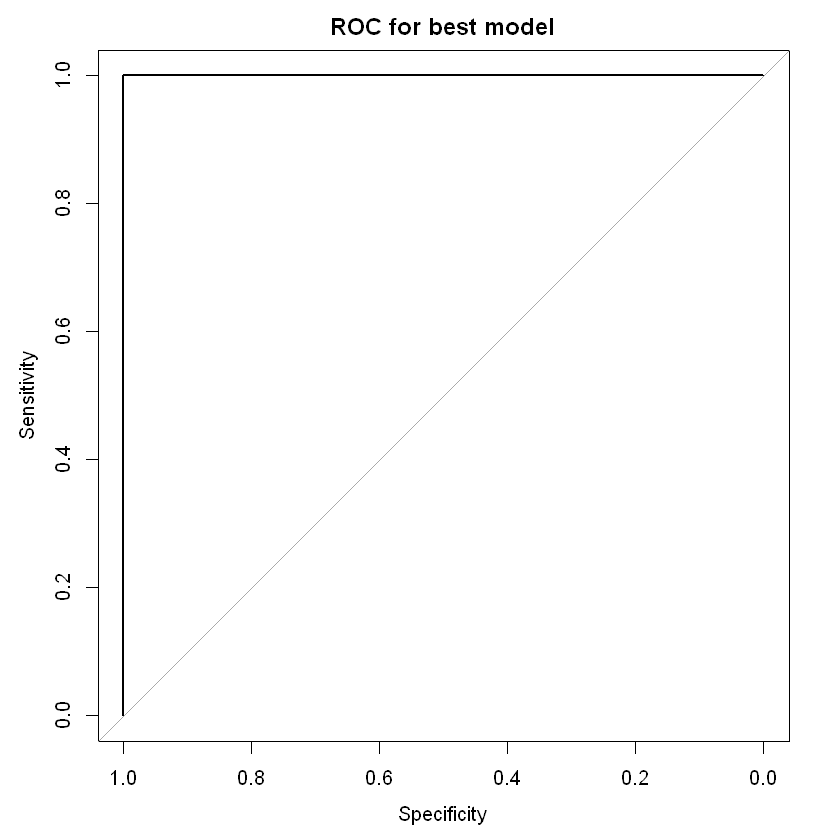

In [73]:
roc.curve(c2,market_changed2)

## Stock and News Data Regression 

### Data Merging

In [74]:
market_new = market_data_preparation(market)

In [75]:
news_new = news_data_preparation(news)

Adding missing grouping variables: `assetName`, `sentimentClass`


In [76]:
combined_df = combined_data_preparation(market_new,news_new)

In [77]:
head(combined_df)

,time,assetName,X1.x,assetCode,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevRaw10,...,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,sentence_word_count,assetCodesLen,headlinesLen,assetSentimentCount,headlineTagT
1,2007-02-01,3M Co,844,MMM.N,6503300,73.99,74.75,-0.004172275,0.007276647,-0.061159751,...,4,4,72,72,74,22.87500,5,59,29,5
10,2007-02-01,Abbott Laboratories,8,ABT.N,5692300,52.87,52.50,-0.002452830,-0.004739336,0.001515439,...,1,1,2,10,10,25.81818,5,58,39,5
22,2007-02-01,Agrium Inc,44,AGU.N,2034900,34.91,34.91,0.006632065,0.018972563,0.038678965,...,2,2,2,2,2,23.03125,6,58,2,11
29,2007-02-01,AirTran Holdings Inc,1,AAI.N,2051600,11.12,11.08,0.004516712,-0.007168459,-0.078707539,...,6,6,10,10,42,18.64286,5,58,27,5
30,2007-02-01,AirTran Holdings Inc,1,AAI.N,2051600,11.12,11.08,0.004516712,-0.007168459,-0.078707539,...,14,14,17,18,30,20.11765,5,58,27,11
48,2007-02-01,Allegheny Technologies Inc,112,ATI.N,2279900,103.90,104.20,0.003961735,0.019569472,0.149845064,...,1,1,2,2,7,14.89362,5,40,4,19


In [78]:
print("Dimensions of combined table:")
dim(combined_df)

[1] "Dimensions of combined table:"


[1] 526  55

In [79]:
market_changed3 = combined_df%>%
  select(returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open,assetCodesLen,sentence_word_count,
        assetCodesLen,headlinesLen,assetSentimentCount,headlineTagT)

### LM

In [80]:
d11 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed3,"lm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [81]:
d1 = calculation.function(d11,market_changed3)

In [82]:
display.modelling.result(d1)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: lm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -2090.64392399751
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + "                                           
[2] "    close_to_open + assetCodesLen + assetSentimentCount + returnsOpenPrevRaw1_to_volume:volume_to_mean + "
[3] "    close_to_open:volume_to_mean + close_to_open:returnsOpenPrevRaw1_to_volume + "                        
[4] "    assetCodesLen:volume_to_mean + assetCodesLen:returnsOpenPrevRaw1_to_volume + "                        
[5] "    assetCodesLen:close_to_open + sentence_word_count:returnsOpenPrevRaw1_to_volume + "                   
[6] "    sentence_word_count:assetCodesLen + headlinesLen:returnsOpenPrevRaw1_to_volume + "                    
[7] "    headlinesLen:sentence_word_count + assetSentimentCount:returnsOpenPrevRaw1_to_volume + "              
[8] "    assetSentimentCount:assetCodesLen"            

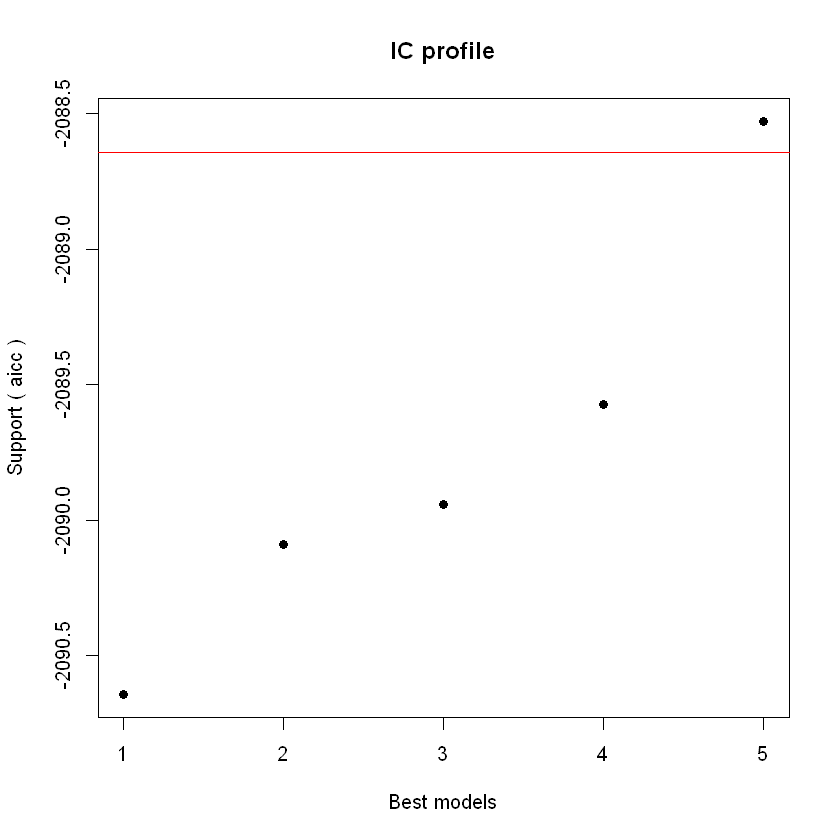

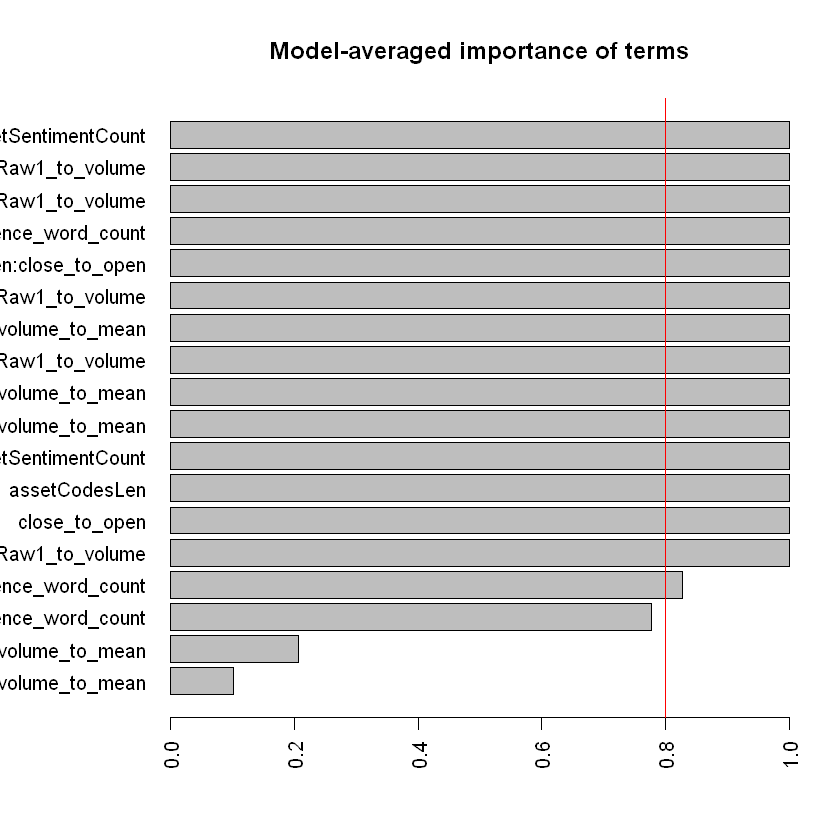

In [83]:
plot.modelling.result(d1)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

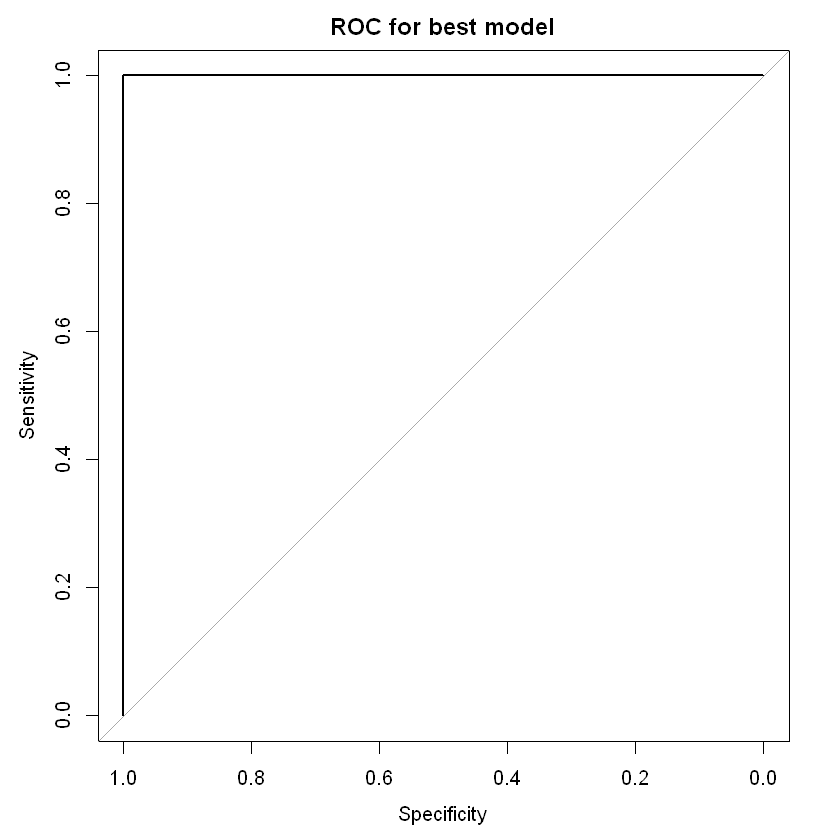

In [84]:
roc.curve(d1,market_changed3)

### GLM

In [85]:
d21 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed3,"glm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: a

Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [86]:
d2 = calculation.function(d21,market_changed3)

In [87]:
display.modelling.result(d2)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -2089.8693095927
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + "             
[2] "    close_to_open + assetCodesLen + returnsOpenPrevRaw1_to_volume:volume_to_mean + "         
[3] "    close_to_open:returnsOpenPrevRaw1_to_volume + assetCodesLen:volume_to_mean + "           
[4] "    assetCodesLen:returnsOpenPrevRaw1_to_volume + assetCodesLen:close_to_open + "            
[5] "    headlinesLen:returnsOpenPrevRaw1_to_volume + headlinesLen:assetCodesLen + "              
[6] "    assetSentimentCount:returnsOpenPrevRaw1_to_volume + assetSentimentCount:close_to_open + "
[7] "    assetSentimentCount:assetCodesLen"                                                       
Evidence weight: 0.287656713092788
Worst IC: -2088.65553363404
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence a

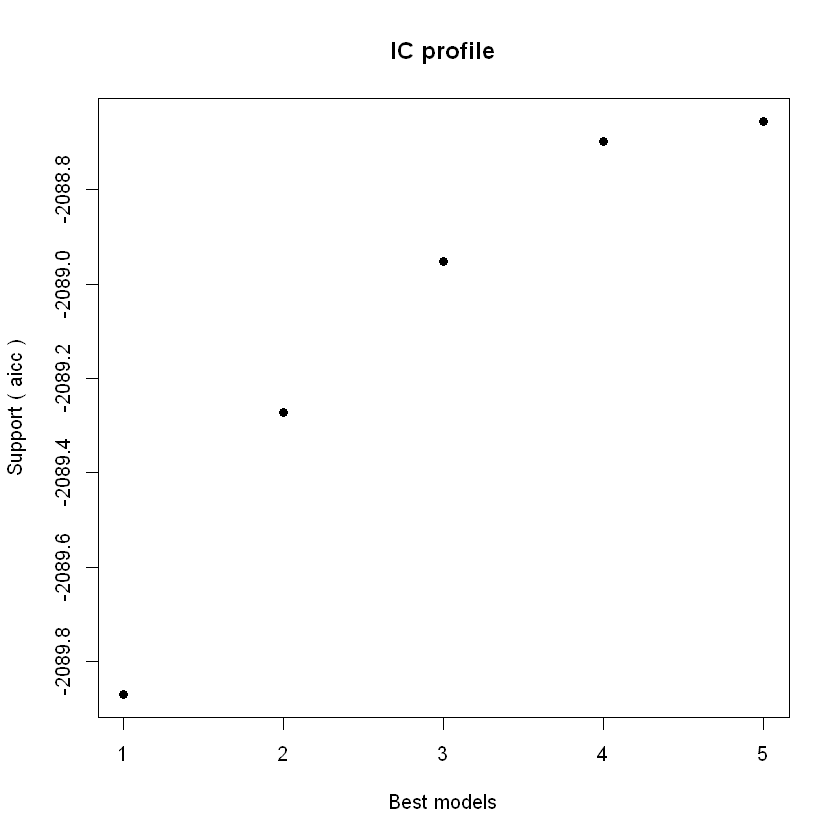

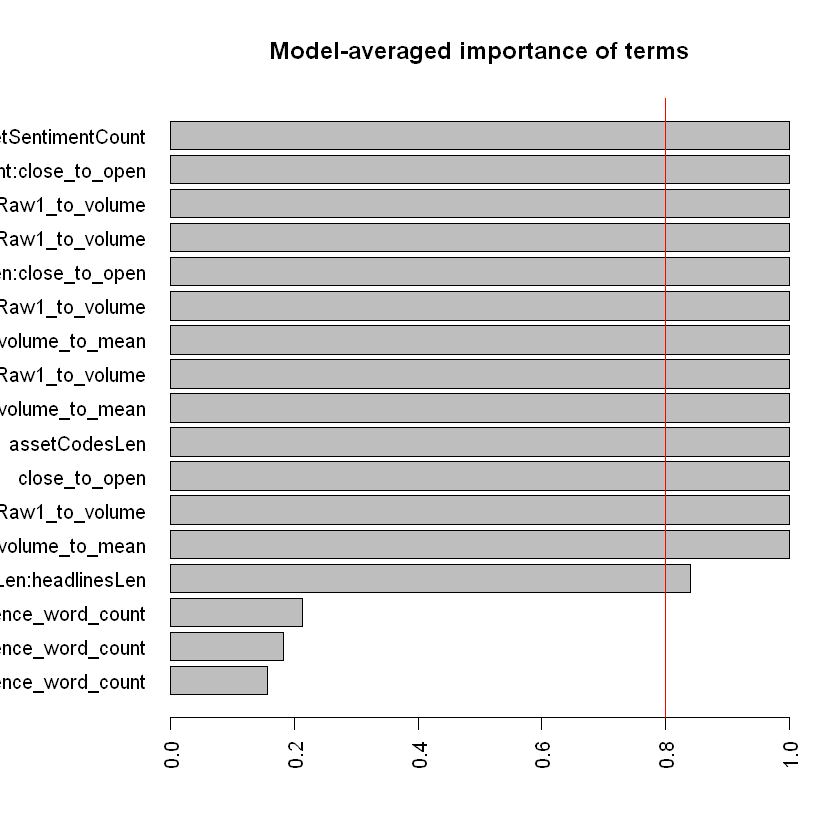

In [88]:
plot.modelling.result(d2)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

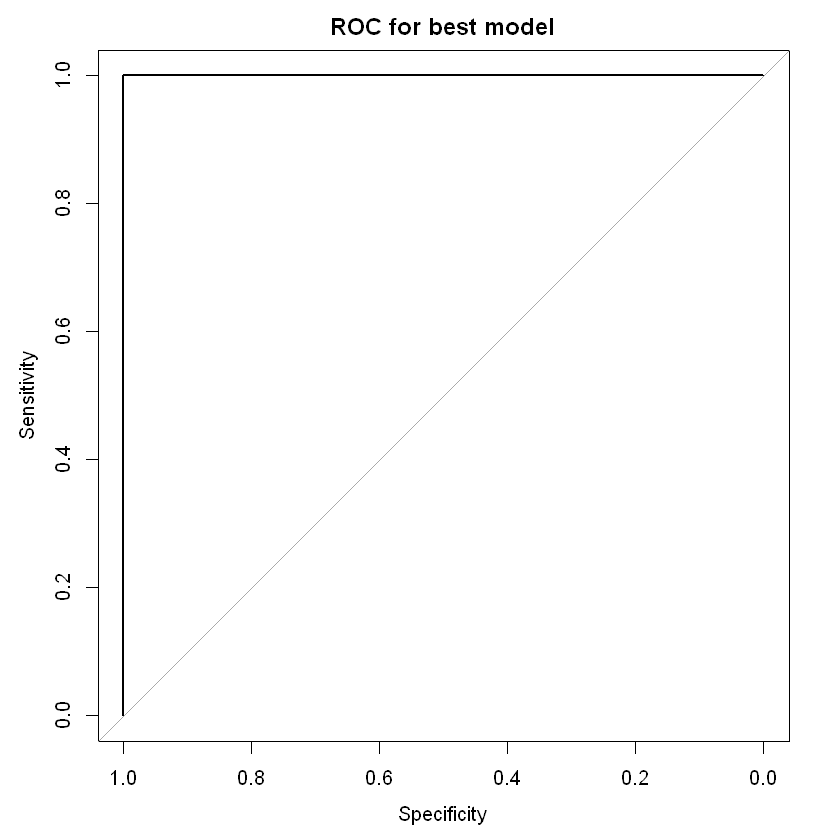

In [89]:
roc.curve(d2,market_changed3)

In [90]:
market_changed4 = combined_df%>%
  select(returnsOpenNextMktres10,volume_to_mean,returnsOpenPrevRaw1_to_volume,close_to_open,sentence_word_count,
        headlinesLen,assetSentimentCount)

## LM

In [91]:
e11 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed4,"lm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [92]:
e1 = calculation.function(e11,market_changed4)

In [93]:
display.modelling.result(e1)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: lm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -2026.49167183545
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + "                               
[2] "    close_to_open + sentence_word_count + returnsOpenPrevRaw1_to_volume:volume_to_mean + "    
[3] "    close_to_open:returnsOpenPrevRaw1_to_volume + sentence_word_count:volume_to_mean + "      
[4] "    sentence_word_count:returnsOpenPrevRaw1_to_volume + assetSentimentCount:volume_to_mean + "
[5] "    assetSentimentCount:headlinesLen"                                                         
Evidence weight: 0.24913158412086
Worst IC: -2025.53078734251
5 models within 2 IC units.
4 models to reach 95% of evidence weight.
Convergence after 300 generations.
Time elapsed: 17.7300219535828 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                               

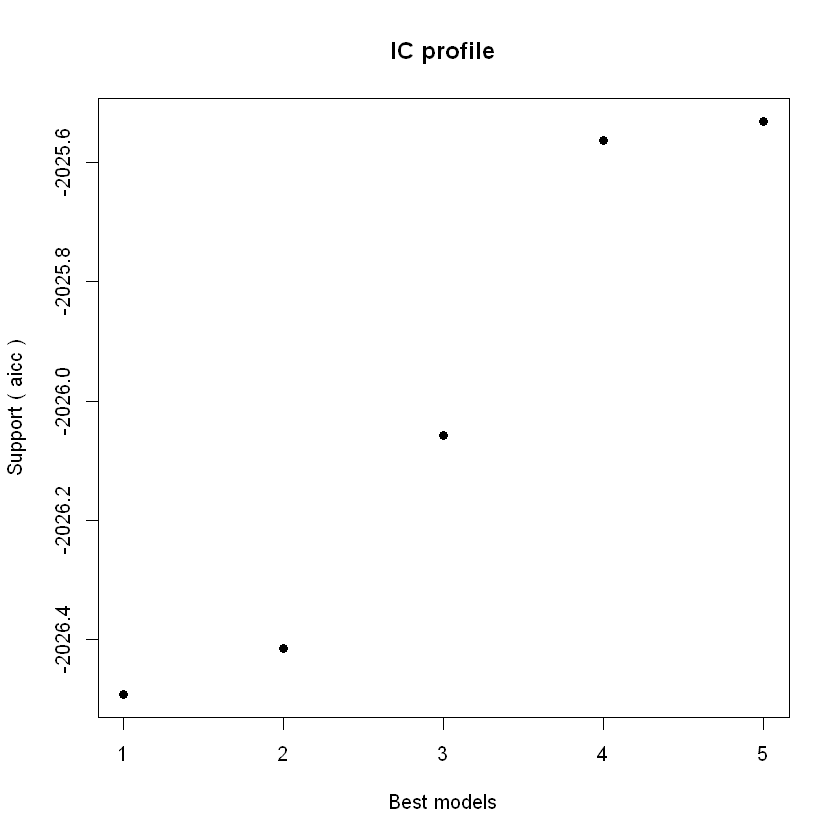

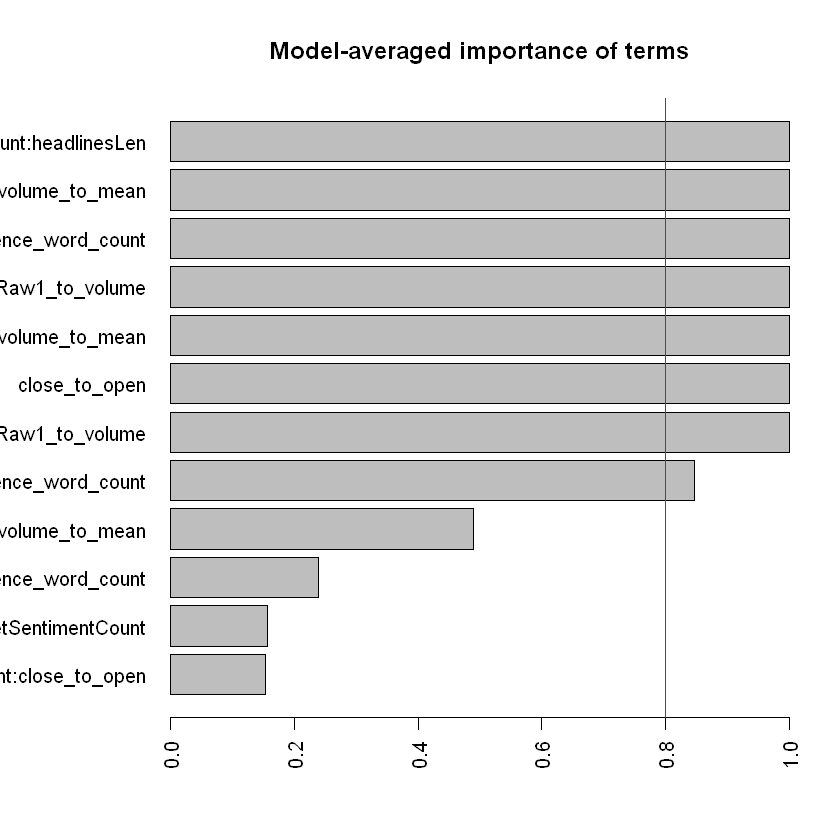

In [94]:
plot.modelling.result(e1)

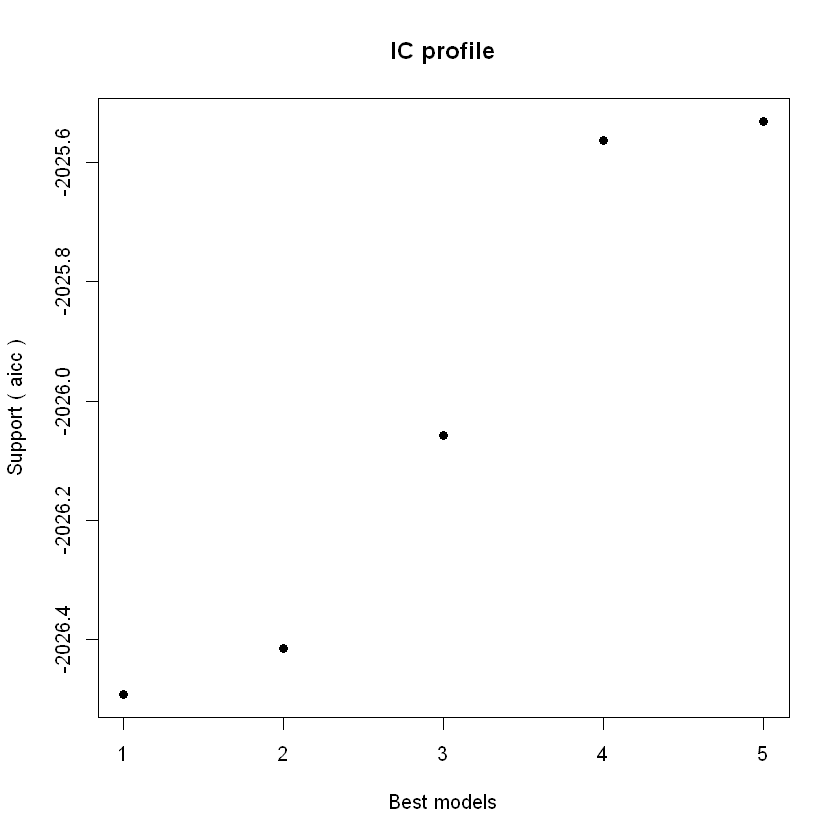

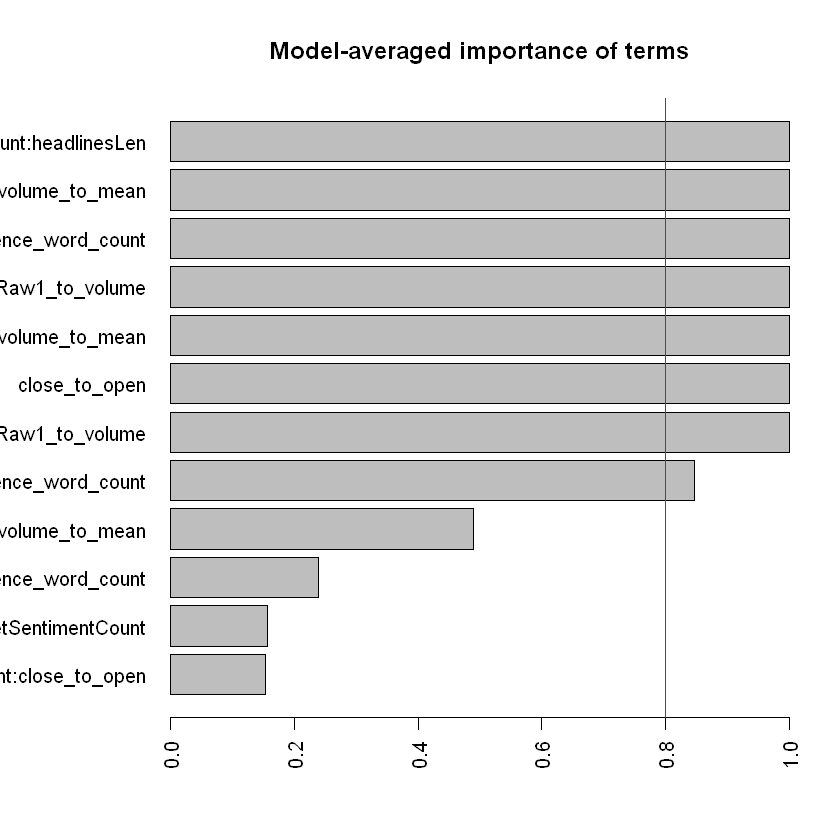

In [95]:
plot.modelling.result(e1)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

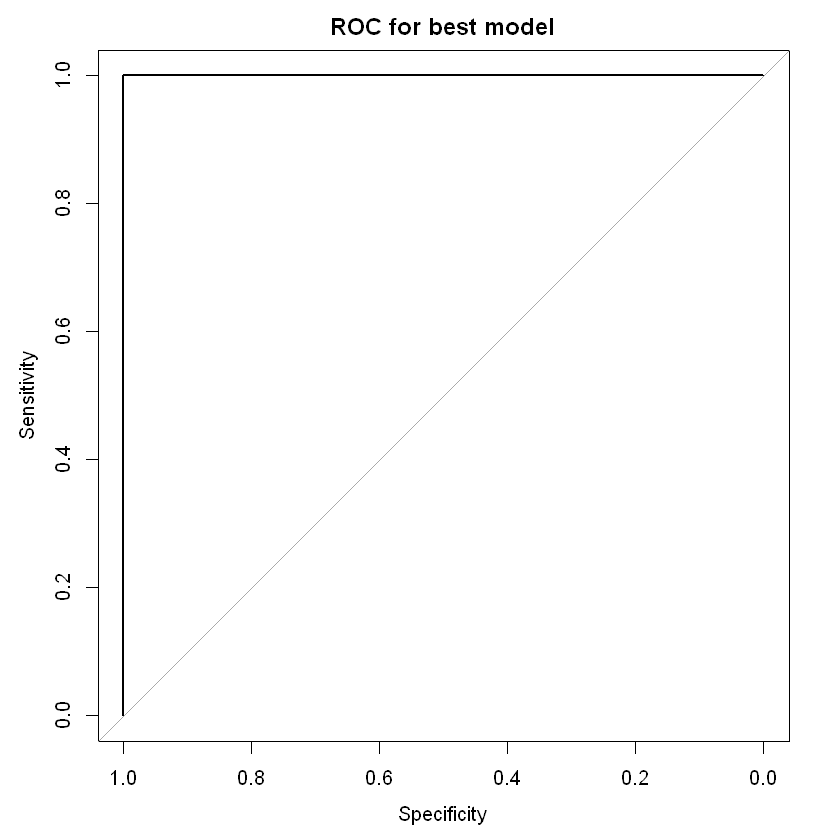

In [96]:
roc.curve(e1,market_changed4)

## GLM

In [97]:
e21 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed4,"glm")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [98]:
e2 = calculation.function(e21,market_changed4)

In [99]:
display.modelling.result(e2)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: glm / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -2026.41717743399
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + volume_to_mean + returnsOpenPrevRaw1_to_volume + "                         
[2] "    close_to_open + sentence_word_count + headlinesLen + returnsOpenPrevRaw1_to_volume:volume_to_mean + "
[3] "    close_to_open:returnsOpenPrevRaw1_to_volume + sentence_word_count:volume_to_mean + "                 
[4] "    sentence_word_count:returnsOpenPrevRaw1_to_volume + sentence_word_count:close_to_open + "            
[5] "    headlinesLen:volume_to_mean + headlinesLen:returnsOpenPrevRaw1_to_volume + "                         
[6] "    headlinesLen:close_to_open + assetSentimentCount:volume_to_mean + "                                  
[7] "    assetSentimentCount:sentence_word_count"                                                             
Evidence weight: 0.357053885127155
Worst IC: -2024.6718509338

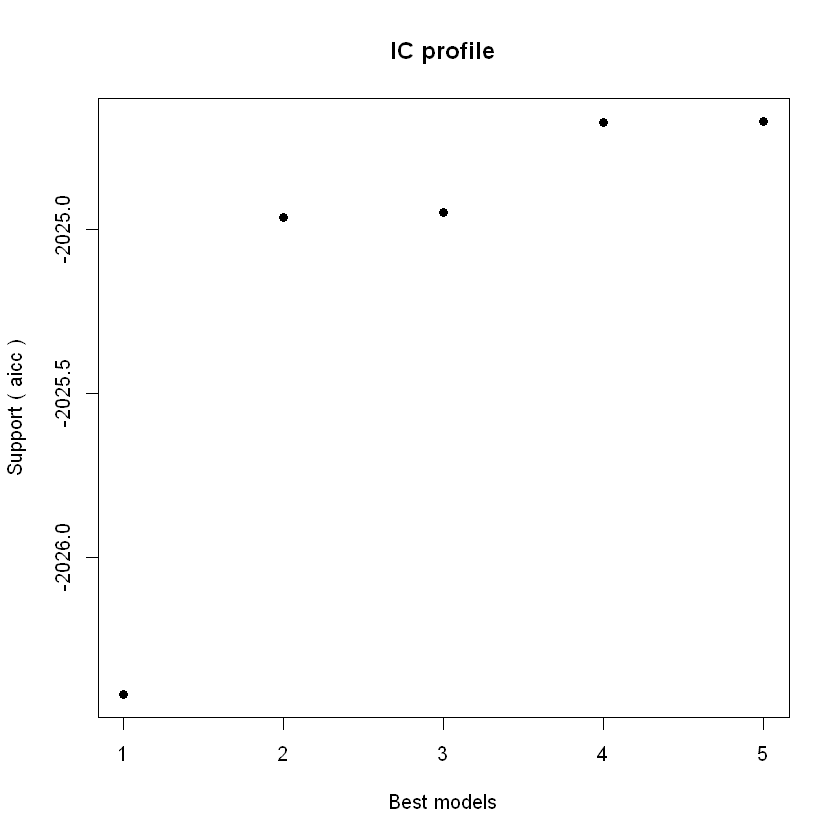

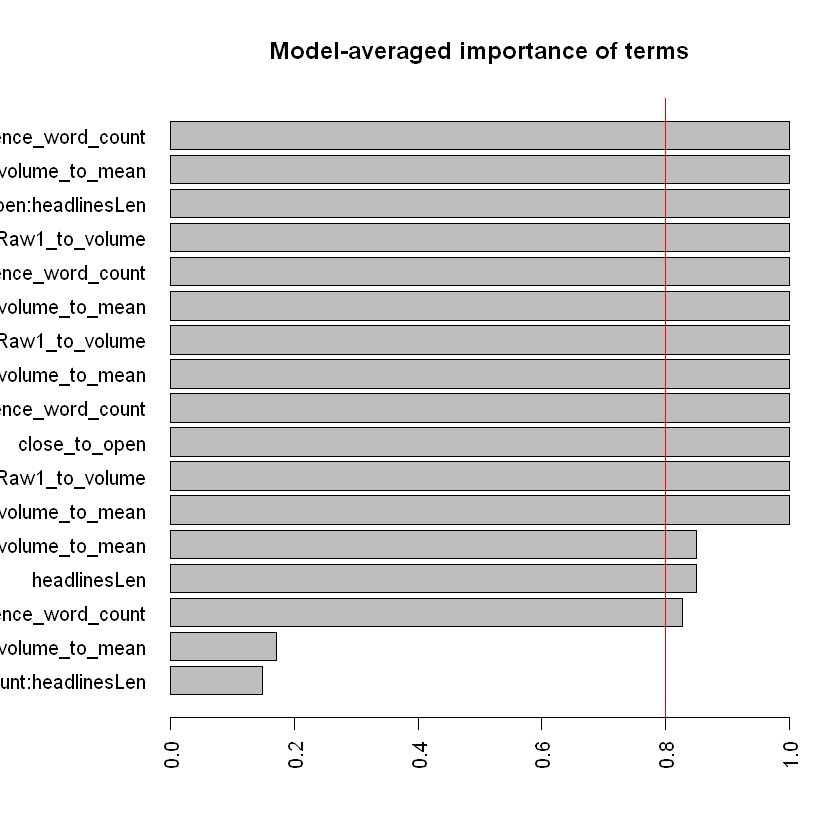

In [100]:
plot.modelling.result(e2)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

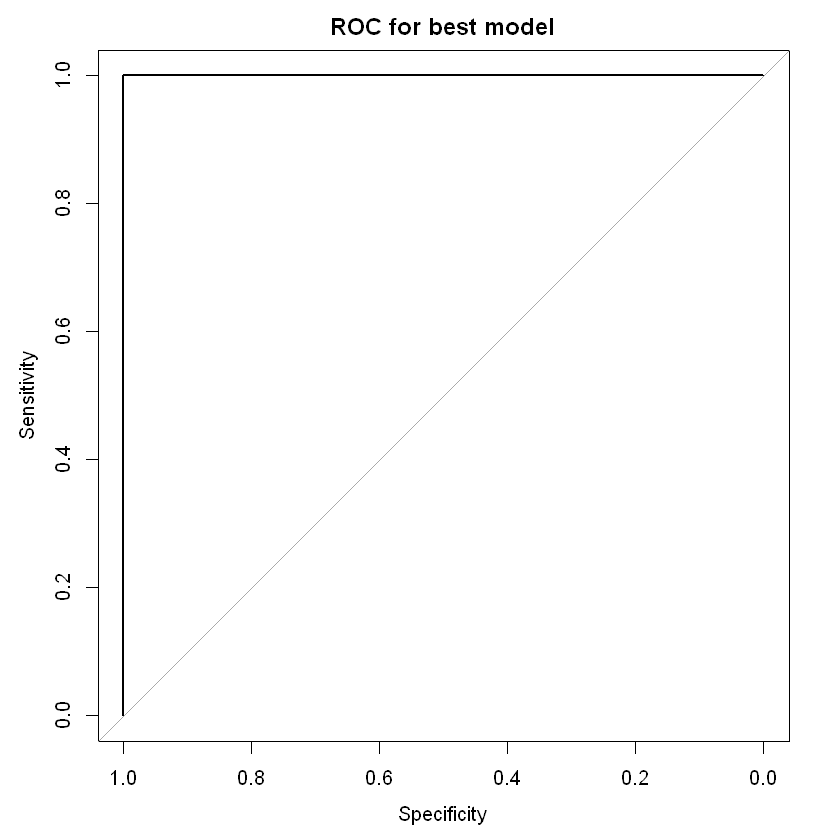

In [101]:
roc.curve(e2,market_changed4)

## GLS

In [102]:
e31 = modelling.function(as.formula(returnsOpenNextMktres10~.), market_changed4,"gls")

TASK: Genetic algorithm in the candidate set.
Initialization...
Algorithm started...
Improvements in best and average IC have bebingo en below the specified goals.
Algorithm is declared to have converged.
Completed.


In [103]:
e3 = calculation.function(e31,market_changed4)

In [104]:
display.modelling.result(e3)

[1] "Brief summary"
glmulti.analysis
Method: g / Fitting: gls / IC used: aicc
Level: 2 / Marginality: FALSE
From 5 models:
Best IC: -2139.55075626627
Best model:
[1] "returnsOpenNextMktres10 ~ 1 + returnsOpenPrevRaw1_to_volume + "                                       
[2] "    returnsOpenPrevRaw1_to_volume:volume_to_mean + close_to_open:returnsOpenPrevRaw1_to_volume + "    
[3] "    sentence_word_count:returnsOpenPrevRaw1_to_volume + headlinesLen:returnsOpenPrevRaw1_to_volume + "
[4] "    assetSentimentCount:returnsOpenPrevRaw1_to_volume"                                                
Evidence weight: 0.675376438125578
Worst IC: -2125.68519886402
2 models within 2 IC units.
1 models to reach 95% of evidence weight.
Convergence after 220 generations.
Time elapsed: 21.673131942749 minutes.
[1] "Best model"
[1] "Best model results"
          1                                                                                                                                                  

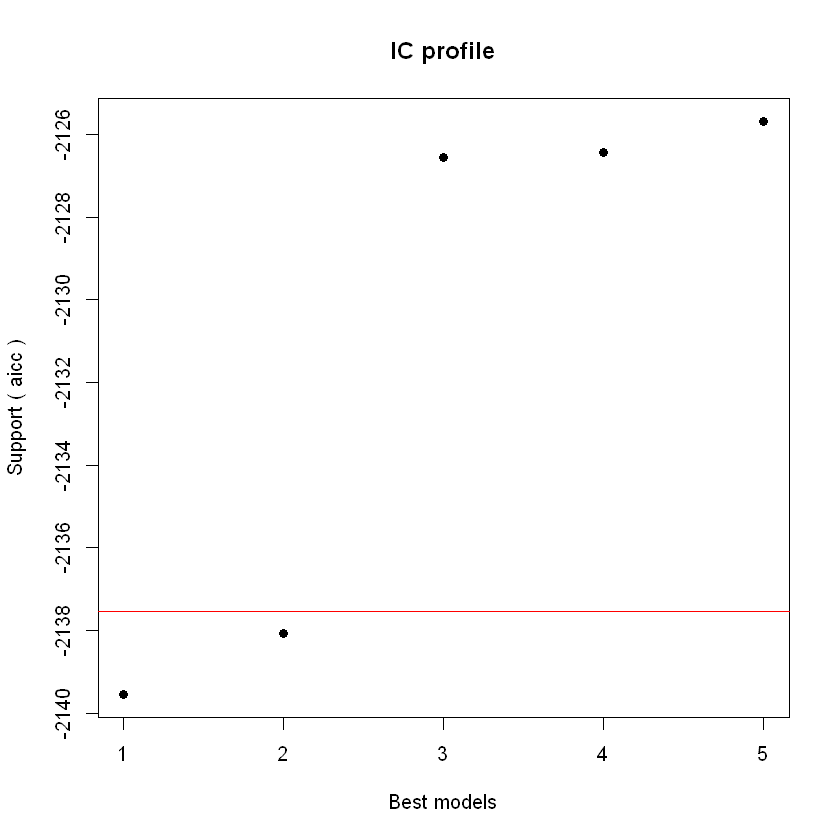

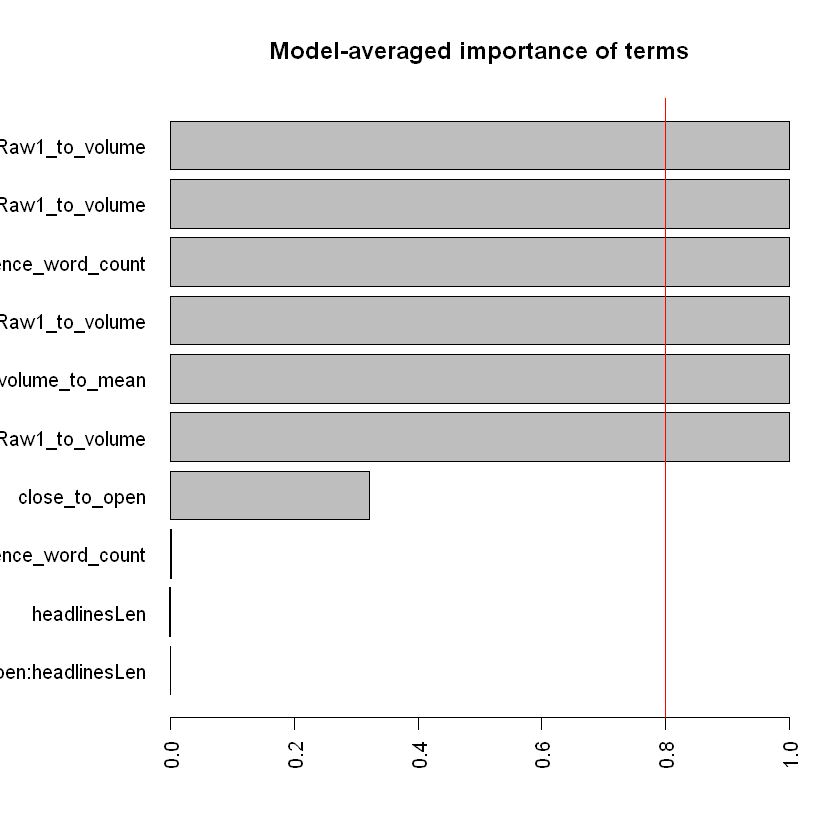

In [105]:
plot.modelling.result(e3)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

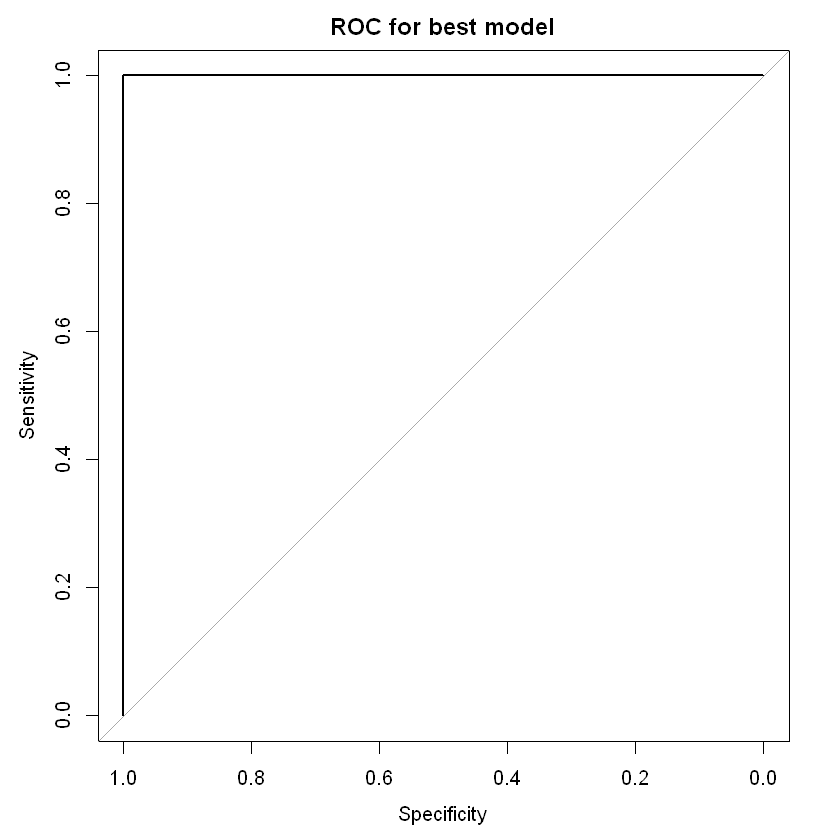

In [106]:
roc.curve(e3,market_changed4)

##  Random Forest

In [107]:
randomF1 = randomForest(returnsOpenNextMktres10~.,data=m1)
print(randomF1) 
importance(randomF1)


Call:
 randomForest(formula = returnsOpenNextMktres10 ~ ., data = m1) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 0.002766589
                    % Var explained: -4.84


,IncNodePurity
volume,0.3965307
returnsClosePrevRaw1,0.4049413
returnsOpenPrevRaw1,0.4492563
returnsClosePrevRaw10,0.4466942
open,0.3308739
close,0.3409574


In [108]:
randomF2 = randomForest(returnsOpenNextMktres10~.,data=market_changed1)
print(randomF2) 
importance(randomF2)


Call:
 randomForest(formula = returnsOpenNextMktres10 ~ ., data = market_changed1) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.002855136
                    % Var explained: -8.19


,IncNodePurity
volume_to_mean,0.7237136
returnsOpenPrevRaw1_to_volume,0.8160765
close_to_open,0.7202456


In [109]:
randomF3= randomForest(returnsOpenNextMktres10~.,data=market_changed2)
print(randomF3) 
importance(randomF3)


Call:
 randomForest(formula = returnsOpenNextMktres10 ~ ., data = market_changed2) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.00275327
                    % Var explained: -4.33


,IncNodePurity
volume_to_mean,0.2372676
returnsOpenPrevRaw1_to_volume,0.3280846
close_to_open,0.2489562
volume,0.2443333
returnsClosePrevRaw1,0.2767511
returnsOpenPrevRaw1,0.2940046
returnsClosePrevRaw10,0.3405729
open,0.2196896
close,0.2290867


In [110]:
randomF4 = randomForest(returnsOpenNextMktres10~.,data=market_changed4)
print(randomF4) 
importance(randomF4)


Call:
 randomForest(formula = returnsOpenNextMktres10 ~ ., data = market_changed4) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 0.0003606033
                    % Var explained: 76.77


,IncNodePurity
volume_to_mean,0.17220574
returnsOpenPrevRaw1_to_volume,0.14987539
close_to_open,0.22739669
sentence_word_count,0.06403462
headlinesLen,0.03277061
assetSentimentCount,0.13884472


## Support Vector Regression

In [111]:
svr_function = function(regression.formula,data_to_fit){
    model = svm(regression.formula, data_to_fit)
    predicted.values = predict(model,data_to_fit)
    rmse.value = rmse(data_to_fit$returnsOpenNextMktres10,predicted.values)
    print("RMSE of SVM model")
    print(rmse.value)
    
    tuned.model = tune(svm, regression.formula, data = data_to_fit, 
                        ranges = list(epsilon = seq(0,1), cost = 2^(seq(0.5,8))))
    
    model2 = svm(regression.formula, data_to_fit, epsilon=tuned.model$best.parameters$epsilon, 
                 cost=tuned.model$best.parameters$cost)
    predicted.values1 = predict(model2,data_to_fit)
    rmse.value1 = rmse(data_to_fit$returnsOpenNextMktres10,predicted.values1)
    print("RMSE based on Tuned SVM model")
    print(rmse.value)
    print("Tuned SVR Model")   
    print(tuned.model)                    
    plot(tuned.model)            
}

[1] "RMSE of SVM model"
[1] 0.04811963
[1] "RMSE based on Tuned SVM model"
[1] 0.04811963
[1] "Tuned SVR Model"

Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon     cost
       0 1.414214

- best performance: 0.002714521 



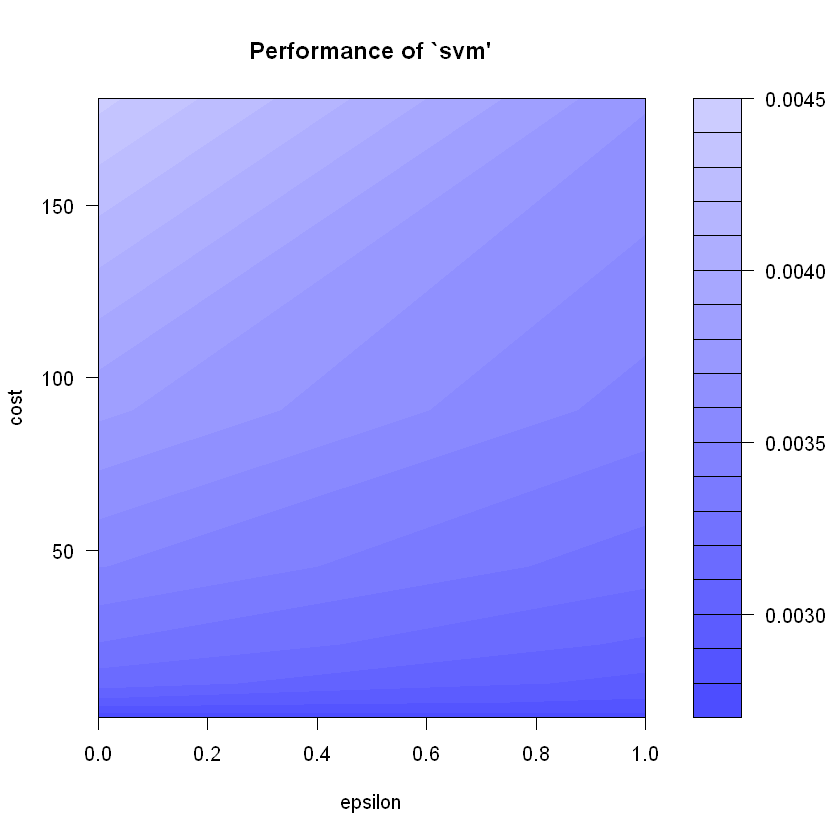

In [112]:
svr_function(as.formula(returnsOpenNextMktres10~.),m1)

[1] "RMSE of SVM model"
[1] 0.04935023
[1] "RMSE based on Tuned SVM model"
[1] 0.04935023
[1] "Tuned SVR Model"

Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon     cost
       0 1.414214

- best performance: 0.002633383 



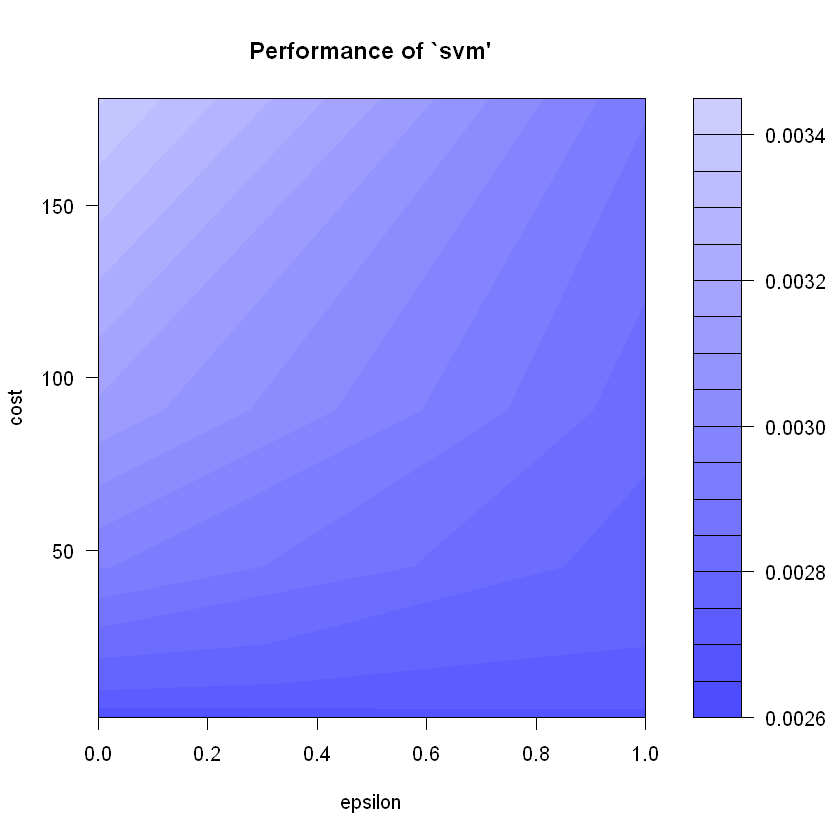

In [113]:
svr_function(as.formula(returnsOpenNextMktres10~.),market_changed1)

[1] "RMSE of SVM model"
[1] 0.04748954
[1] "RMSE based on Tuned SVM model"
[1] 0.04748954
[1] "Tuned SVR Model"

Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon     cost
       0 1.414214

- best performance: 0.002691433 



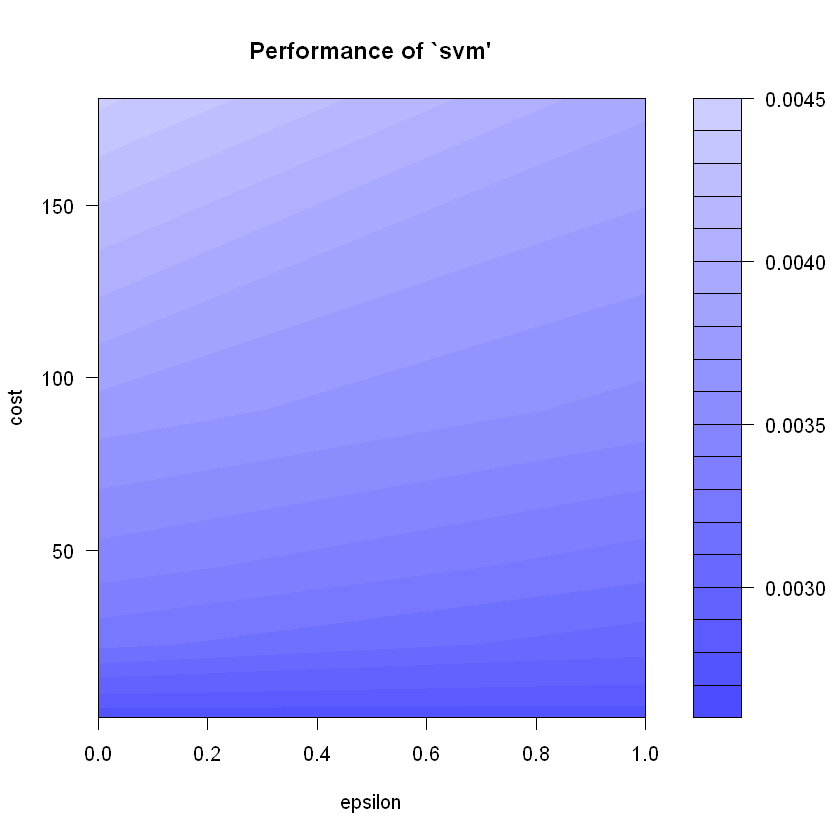

In [114]:
svr_function(as.formula(returnsOpenNextMktres10~.),market_changed2)

[1] "RMSE of SVM model"
[1] 0.03652156
[1] "RMSE based on Tuned SVM model"
[1] 0.03652156
[1] "Tuned SVR Model"

Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon     cost
       0 22.62742

- best performance: 0.00119626 



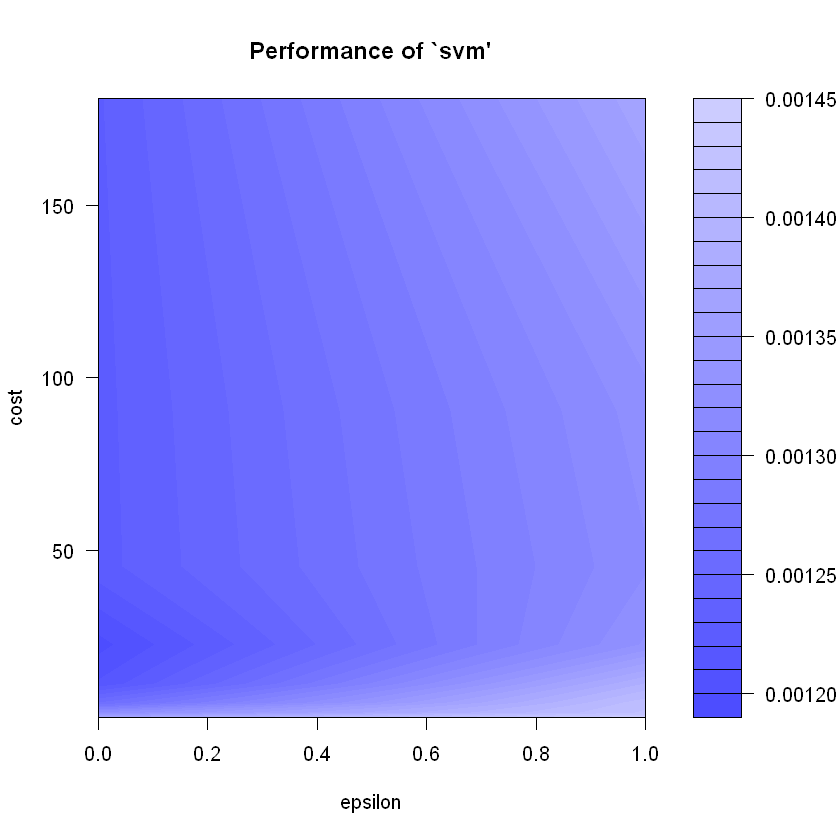

In [115]:
svr_function(as.formula(returnsOpenNextMktres10~.),market_changed3)

[1] "RMSE of SVM model"
[1] 0.03134967
[1] "RMSE based on Tuned SVM model"
[1] 0.03134967
[1] "Tuned SVR Model"

Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon     cost
       0 181.0193

- best performance: 0.0008653473 



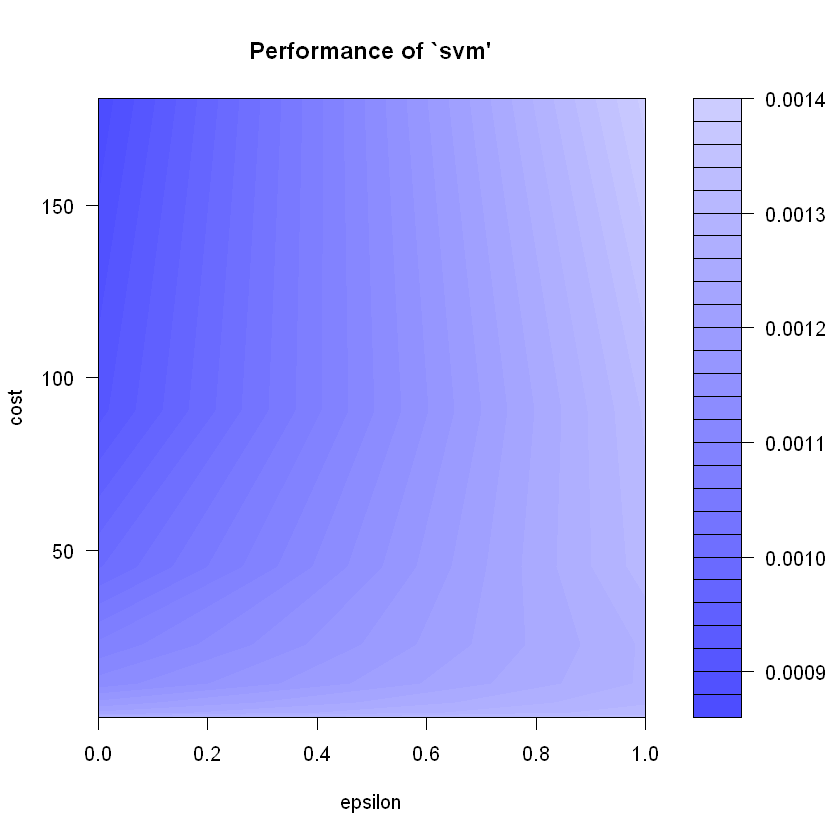

In [116]:
svr_function(as.formula(returnsOpenNextMktres10~.),market_changed4)